# Jupyter notebook for analyzing multiExR synapse data
* data from ALL THREE MICE, processed separately
* no pairwise/correlational data included (data came from _v2_ synapse analysis script)
* Last modified by MES on 6/9/2023

In [1]:
#import relevant packages
import os
import numpy as np
#from skimage import io
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import robust_scale
from sklearn.cluster import KMeans
import scanpy as sc
import anndata
#import leidenalg
#import igraph as ig
from scipy.stats import ttest_ind
import statsmodels.api as sm

In [2]:
def unique(list1): 
      
    # insert the list to the set 
    list_set = set(list1) 
    # convert the set to the list 
    unique_list = (list(list_set))
    return unique_list

In [3]:
filenames = os.listdir()
csvs = [filename for filename in filenames if filename.endswith('csv') and 'all' in filename]

In [4]:
csvs

[]

In [5]:
os.getcwd()

'/Users/margaret/Dropbox (MIT)/mExR_analysis/Scripts/Python'

In [6]:
sc.set_figure_params(dpi=80)

In [7]:
parentdir = '/Users/margaret/Dropbox (MIT)/mExR_analysis/SmallData/2023.03_synapses/multichannel_data/'

In [8]:
os.listdir(parentdir)

['allsynapsedata_S0_20230609.csv',
 'allsynapsedata_S1-2_20230609.csv',
 'allsynapsedata_S1-2_20230603.csv',
 'allsynapsedata_S1-2_20230606.csv',
 'allsynapsedata_S0_20230606.csv',
 'allsynapsedata_S0_20230603.csv']

In [9]:
data1 = pd.read_csv(parentdir + 'allsynapsedata_S0_20230609.csv',index_col='variable')

In [10]:
data2 = pd.read_csv(parentdir + 'allsynapsedata_S1-2_20230609.csv',index_col='variable')

In [11]:
len(list(data2))

160

In [12]:
len(list(data1))

100

In [13]:
len(list(data2.index))

181

In [14]:
len(list(data1.index))

154

# 1) Analyze first dataset

In [15]:
data1 = data1.T

In [16]:
feats = list(data1)

In [17]:
data1=data1[data1['size']>0]

## what is distribution of gephyrin in these synapses?

<AxesSubplot:>

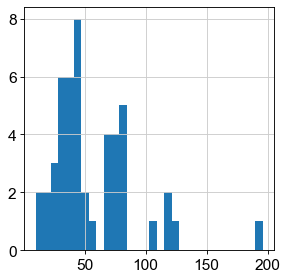

In [18]:
data1['npuncta_Gephyrin'].hist(bins=30)

<AxesSubplot:>

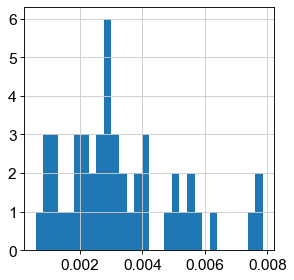

In [19]:
data1['frac_vol_occ_Gephyrin'].hist(bins=30)

<AxesSubplot:>

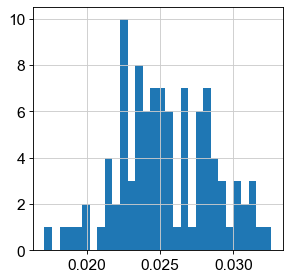

In [20]:
data1['frac_vol_occ_SynGAP'].hist(bins=30)

## Dimensionality reduction and clustering

In [21]:
data1.dropna(axis=1, how='all', inplace=True)

In [22]:
#impute missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(data1)
  
data_clean = imputer.transform(data1)

In [23]:
np.any(np.isnan(data_clean))

False

In [24]:
np.all(np.isfinite(data_clean))

True

In [25]:
len(list(data1))

154

In [26]:
data_clean.shape

(100, 154)

In [27]:
adata = anndata.AnnData(data_clean)
adata.var_names=list(data1)
adata.obs_names=list(data1.index)

/var/folders/71/pthjj8vn7h9596hzsrwryp1w0000gn/T/ipykernel_20123/1043191460.py:1: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(data_clean)


In [28]:
fovs_list = []
for idx, row in data1.iterrows():
    splits = idx.split("_")
    fov = splits[0]
    fovs_list.append(fov)
adata.obs['fov'] = fovs_list

### Cluster synapses using scanpy

In [29]:
list(data1)

['npuncta_Bassoon',
 'npuncta_SynGAP',
 'npuncta_NR1',
 'npuncta_Shank3',
 'npuncta_GluA1',
 'npuncta_CaMKIIa',
 'npuncta_Cav2.1',
 'npuncta_NR2B',
 'npuncta_RIM1',
 'npuncta_PSD95',
 'npuncta_Gephyrin',
 'npuncta_Vglut',
 'npuncta_Vgat',
 'npuncta_RIMBP',
 'npuncta_GluA3',
 'npuncta_Stargazin',
 'npuncta_GluA2',
 'size',
 'frac_vol_occ_Bassoon',
 'frac_vol_occ_SynGAP',
 'frac_vol_occ_NR1',
 'frac_vol_occ_Shank3',
 'frac_vol_occ_GluA1',
 'frac_vol_occ_CaMKIIa',
 'frac_vol_occ_Cav2.1',
 'frac_vol_occ_NR2B',
 'frac_vol_occ_RIM1',
 'frac_vol_occ_PSD95',
 'frac_vol_occ_Gephyrin',
 'frac_vol_occ_Vglut',
 'frac_vol_occ_Vgat',
 'frac_vol_occ_RIMBP',
 'frac_vol_occ_GluA3',
 'frac_vol_occ_Stargazin',
 'frac_vol_occ_GluA2',
 'mean_puncta_vol_Bassoon',
 'mean_puncta_vol_SynGAP',
 'mean_puncta_vol_NR1',
 'mean_puncta_vol_Shank3',
 'mean_puncta_vol_GluA1',
 'mean_puncta_vol_CaMKIIa',
 'mean_puncta_vol_Cav2.1',
 'mean_puncta_vol_NR2B',
 'mean_puncta_vol_RIM1',
 'mean_puncta_vol_PSD95',
 'mean_puncta

In [30]:
adata.shape

(100, 154)

In [31]:
adata.X

array([[ 1.       ,  1.       ,  1.       , ...,  2.       ,  4.       ,
         1.5081476],
       [ 3.       ,  2.       ,  6.       , ...,  2.2117503,  2.4149854,
         1.6407846],
       [10.       ,  2.       ,  4.       , ...,  2.5975254,  3.4933898,
         2.3589466],
       ...,
       [ 3.       ,  2.       ,  1.       , ...,  1.5724913,  2.6457512,
         2.0783982],
       [ 3.       ,  1.       ,  3.       , ...,  1.9230634,  2.6457512,
         2.0783982],
       [ 2.       ,  1.       ,  3.       , ...,  2.       ,  2.6457512,
         2.0783982]], dtype=float32)

In [32]:
adata.raw=adata

In [33]:
sc.pp.normalize_total(adata)#normalizes on a per-synapse basis. so each synapse has values summing to 1

In [34]:
adata.X

array([[1.3556944, 1.3556944, 1.3556944, ..., 2.7113888, 5.4227777,
        2.0445874],
       [2.3497157, 1.5664772, 4.6994314, ..., 1.732328 , 1.8915098,
        1.2851259],
       [5.523493 , 1.1046985, 2.209397 , ..., 1.4347413, 1.9295714,
        1.3029624],
       ...,
       [5.1862183, 3.457479 , 1.7287395, ..., 2.7184277, 4.5738144,
        3.593009 ],
       [4.0231323, 1.3410441, 4.0231323, ..., 2.5789127, 3.548069 ,
        2.7872236],
       [3.5495863, 1.7747931, 5.3243794, ..., 3.5495863, 4.6956615,
        3.6887271]], dtype=float32)

In [35]:
sc.pp.scale(adata,zero_center=True,max_value=10)

In [36]:
np.any(np.isnan(adata.X))

False

In [37]:
sc.tl.pca(adata, svd_solver='arpack')

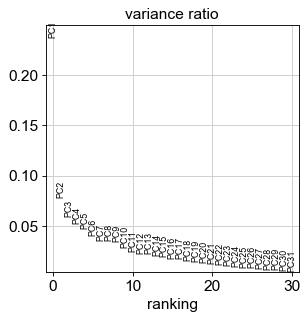

In [38]:
sc.pl.pca_variance_ratio(adata)

In [39]:
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=40)

In [40]:
sc.tl.umap(adata)

In [41]:
sc.tl.leiden(adata,resolution=0.5)

In [42]:
sc.set_figure_params(dpi=300)

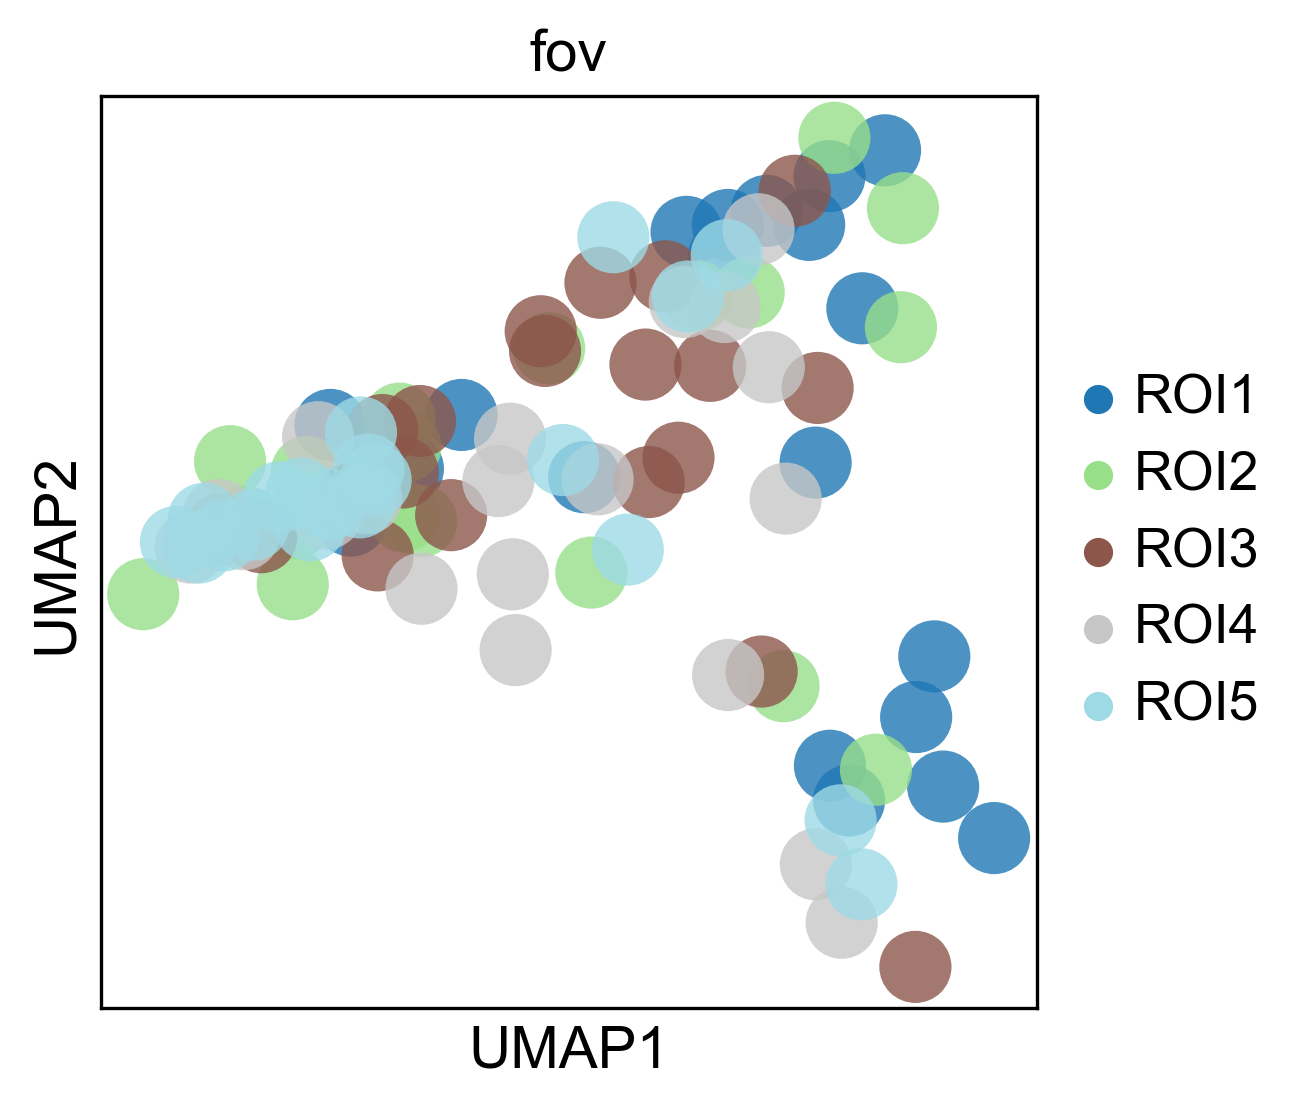

In [43]:
sc.pl.umap(adata, color=['fov'],ncols=1,alpha=0.8,palette='tab20')

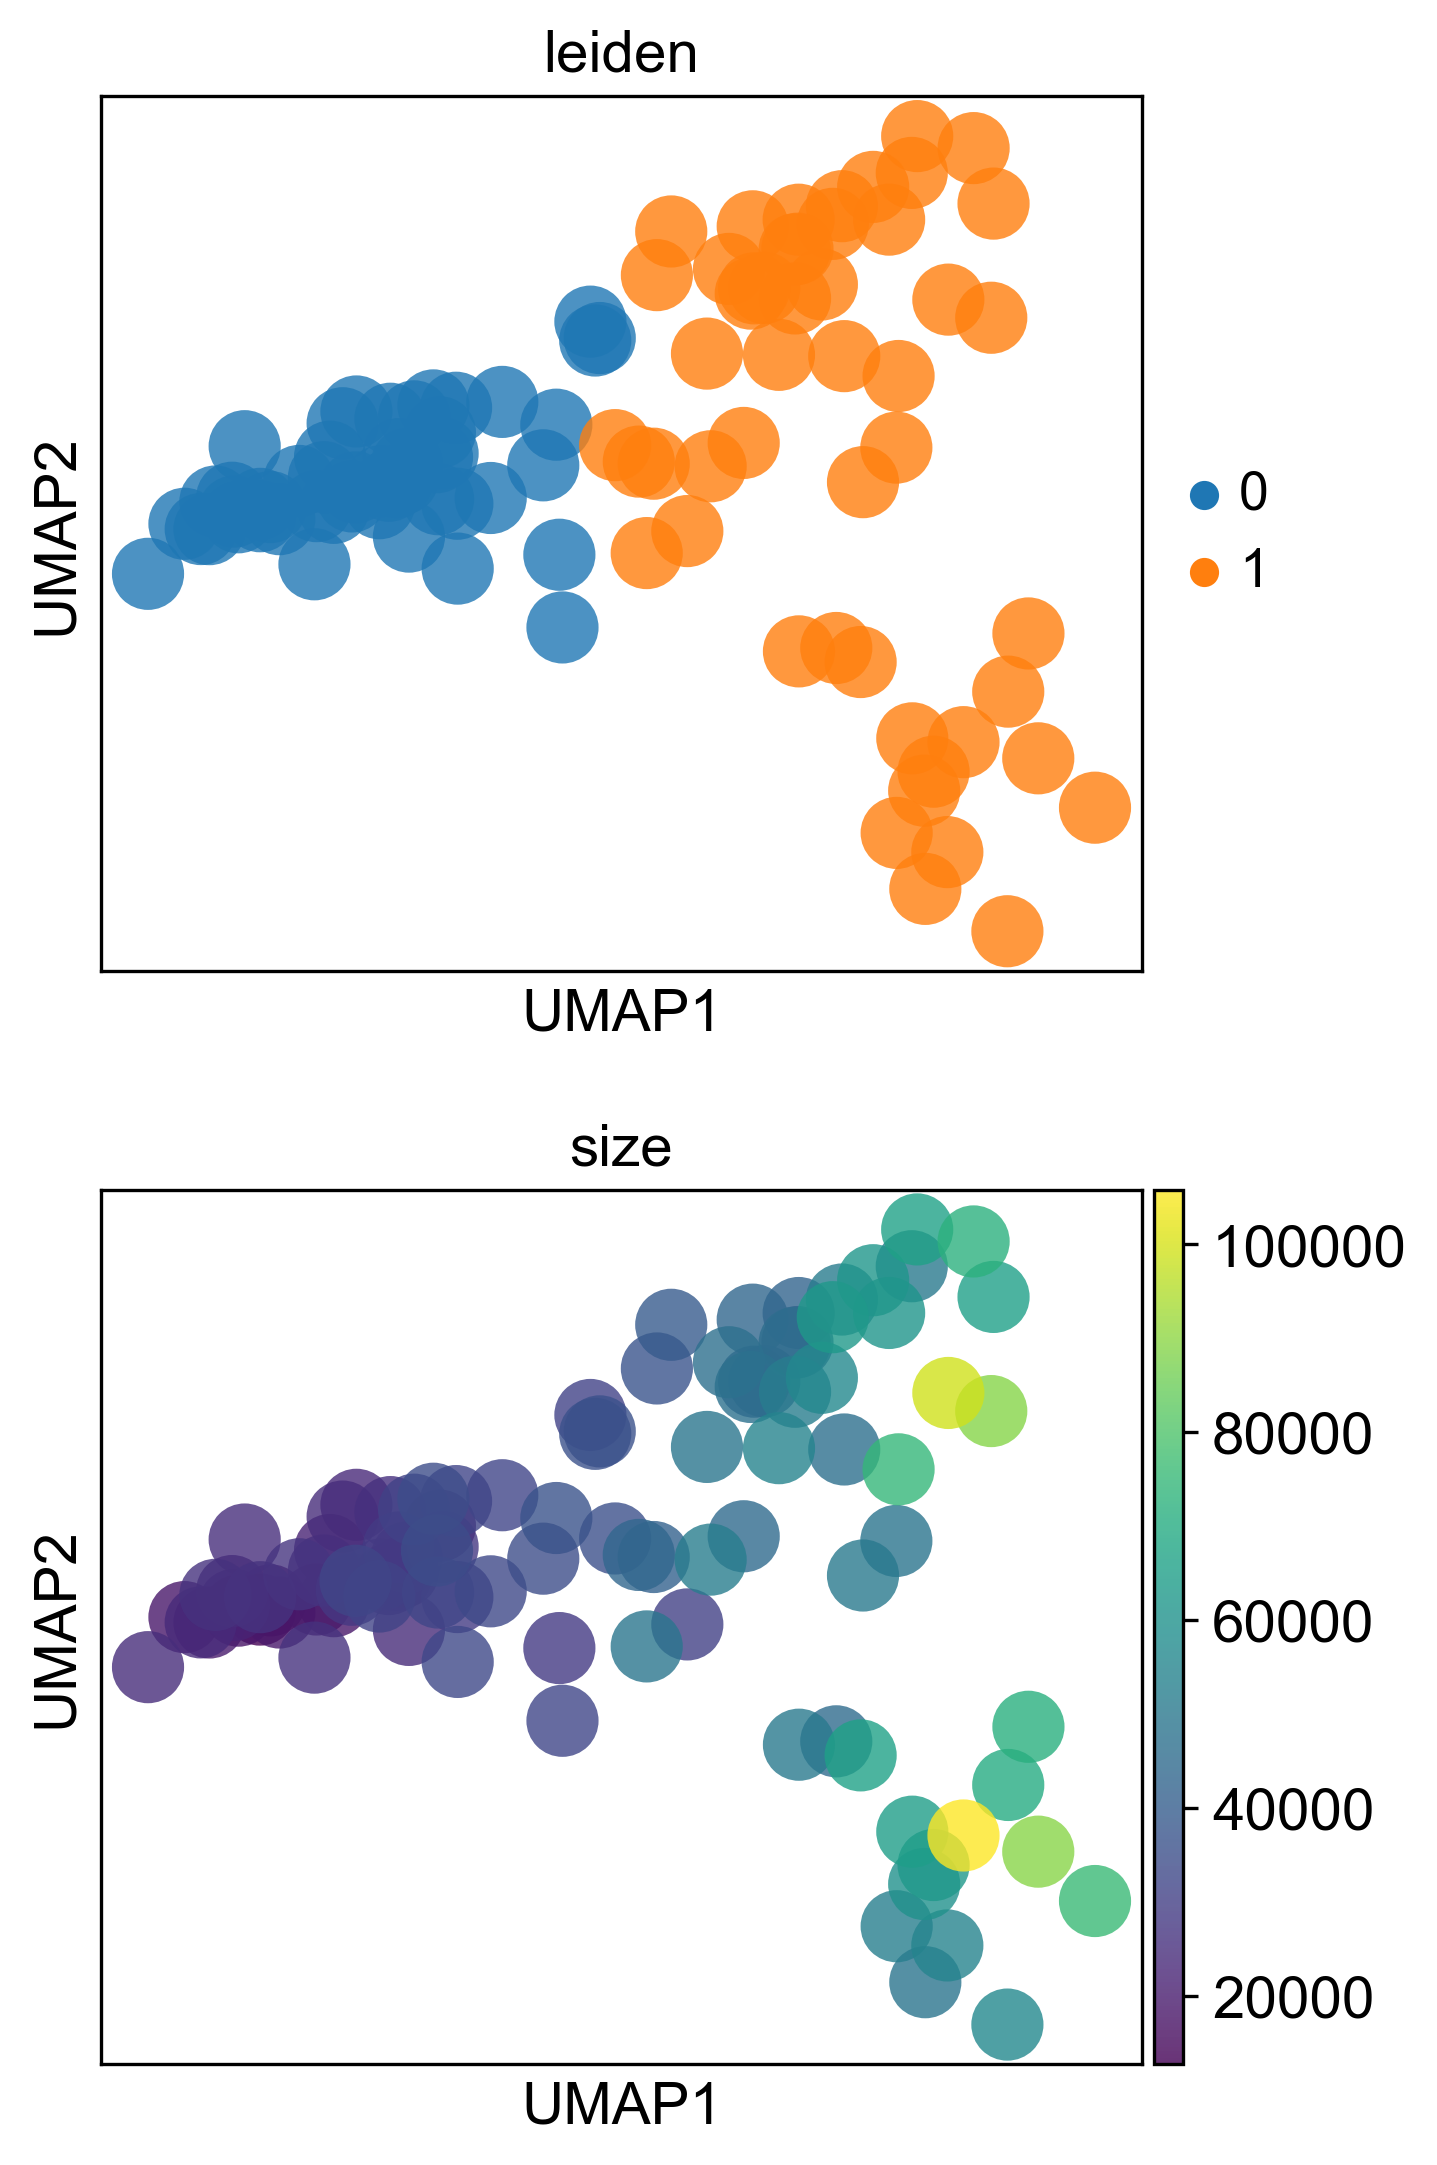

In [44]:
sc.pl.umap(adata, color=['leiden','size'], alpha = 0.8,ncols=1)

In [45]:
clusters = ['0','1','2']

In [46]:
for cluster in clusters:
    adata_sub = adata[adata.obs['leiden']==cluster]
    print(cluster)
    print(adata_sub.obs['fov'].value_counts(normalize=True))

0
ROI5    0.26
ROI2    0.24
ROI4    0.22
ROI3    0.20
ROI1    0.08
Name: fov, dtype: float64
1
ROI1    0.32
ROI3    0.20
ROI4    0.18
ROI2    0.16
ROI5    0.14
Name: fov, dtype: float64
2
Series([], Name: fov, dtype: float64)


/Users/margaret/miniconda3/envs/scanpy/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8942 (\N{VERTICAL ELLIPSIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


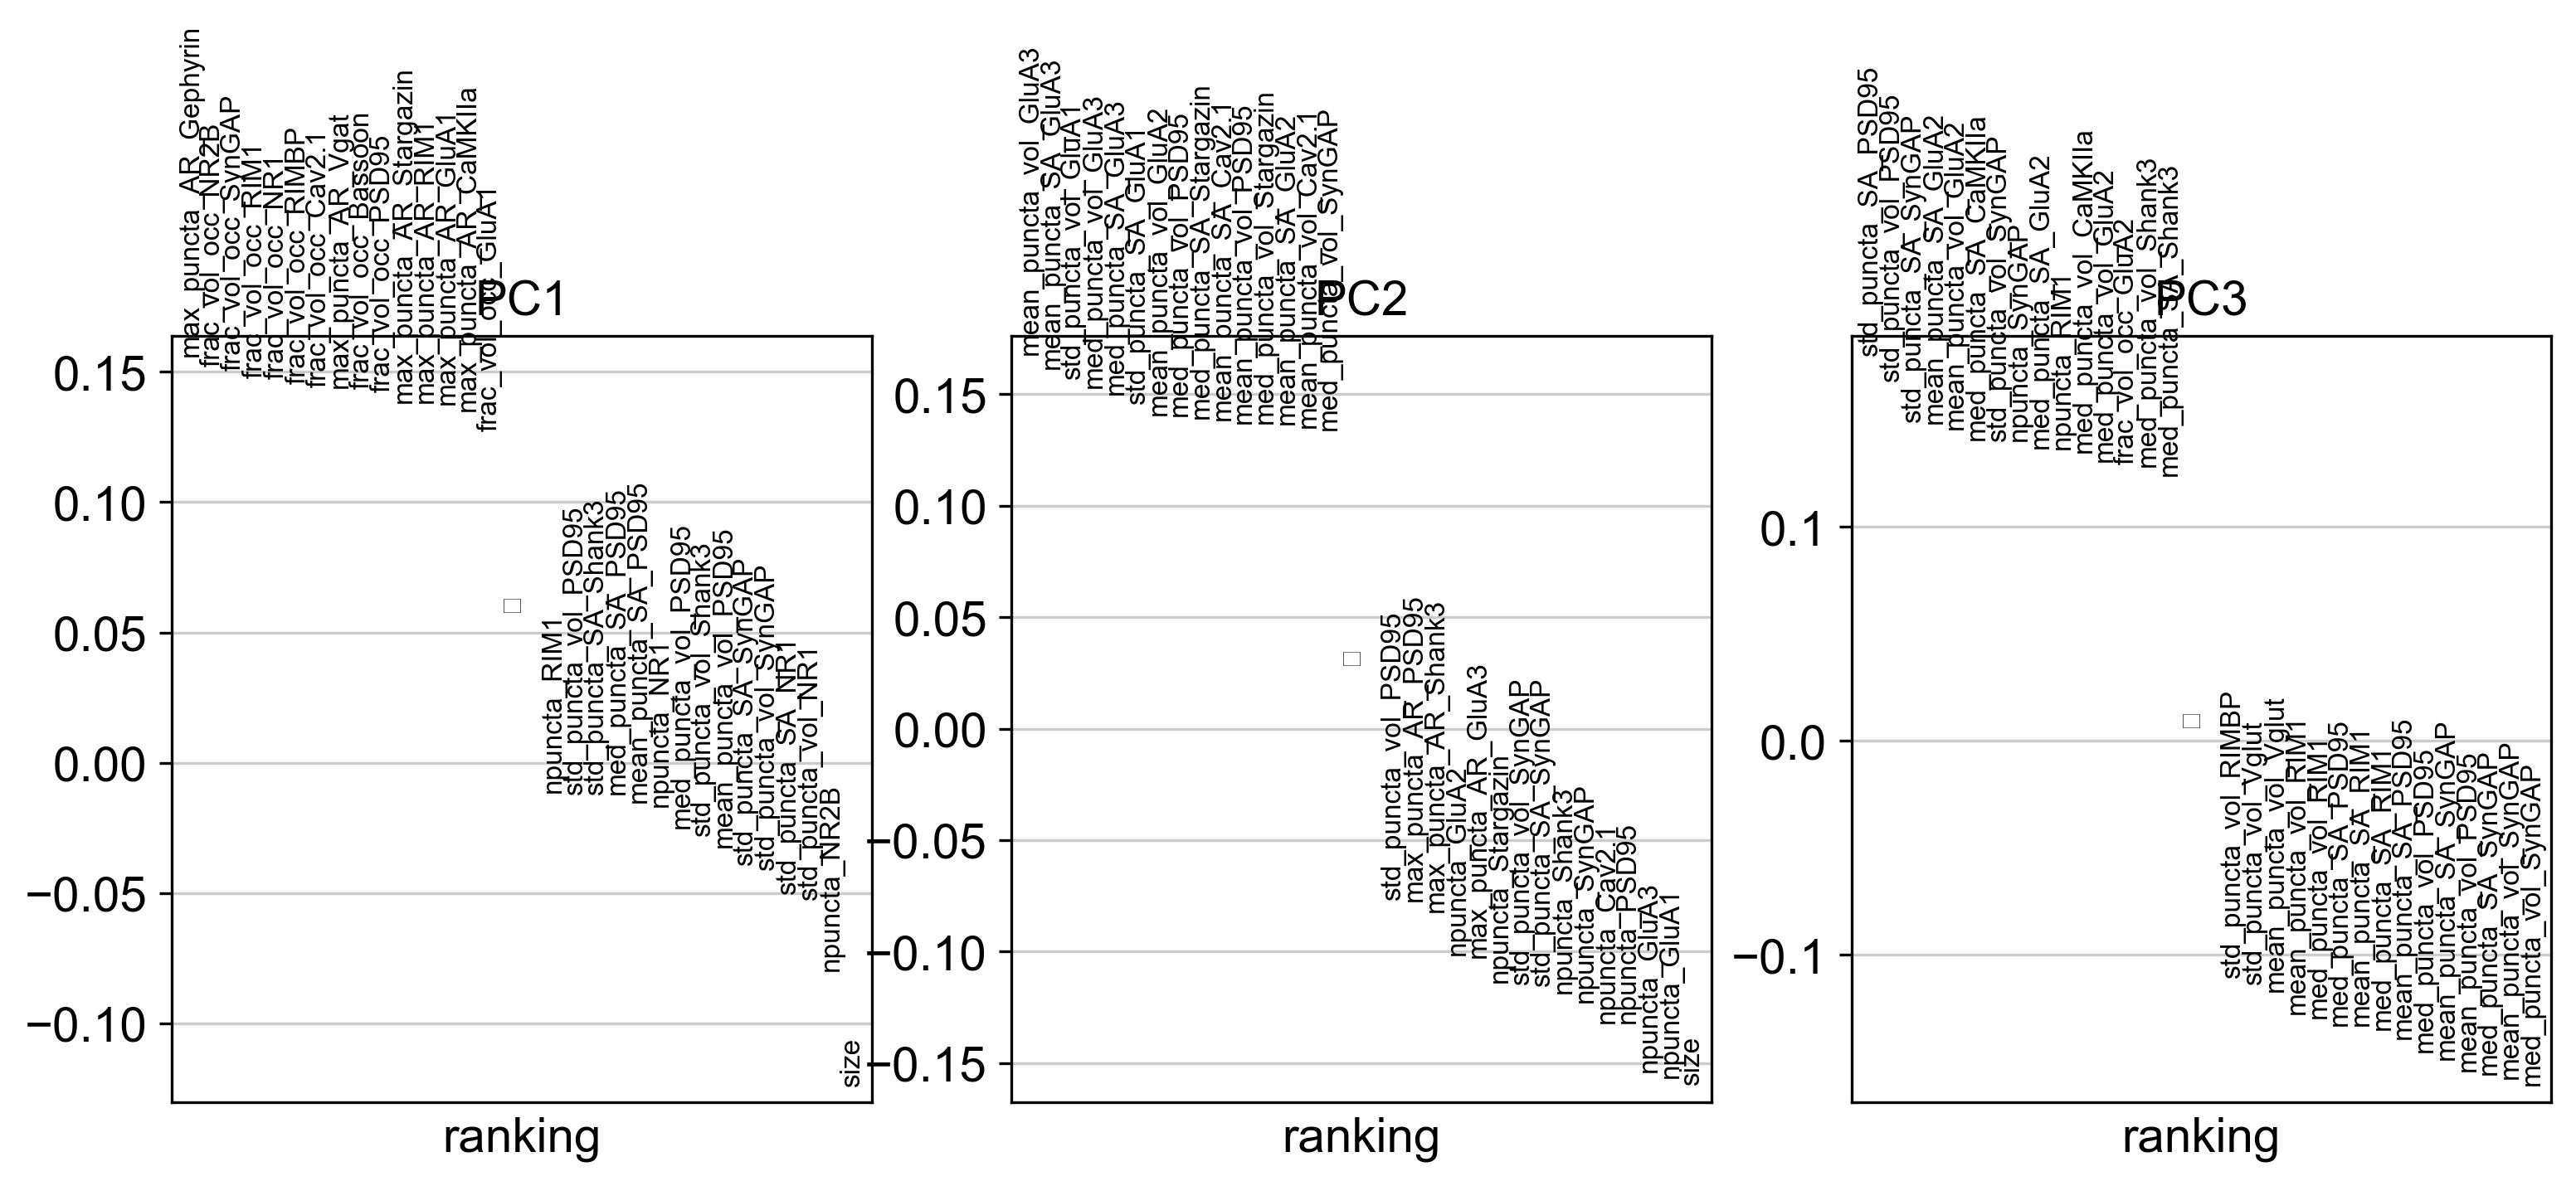

In [47]:
sc.pl.pca_loadings(adata)

In [48]:
#extract marker features for each cluster
sc.tl.rank_genes_groups(adata, groupby='leiden',method='wilcoxon')

/Users/margaret/miniconda3/envs/scanpy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:416: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/Users/margaret/miniconda3/envs/scanpy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/Users/margaret/miniconda3/envs/scanpy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:416: RuntimeWarning: invalid value encountered in true_divide
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/Users/margaret/miniconda3/envs/scanpy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:419: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


In [49]:
markers = pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(10)

In [50]:
markers

0                       1
0       frac_vol_occ_NR2B                    size
1     med_puncta_vol_NR2B            npuncta_Vgat
2      med_puncta_SA_NR2B           npuncta_RIMBP
3     mean_puncta_SA_NR2B            npuncta_NR2B
4  med_puncta_vol_Bassoon         npuncta_Bassoon
5    mean_puncta_vol_NR2B           npuncta_Vglut
6   med_puncta_SA_Bassoon  std_puncta_vol_Bassoon
7       frac_vol_occ_Vgat  mean_puncta_vol_SynGAP
8        frac_vol_occ_NR1   mean_puncta_vol_PSD95
9    med_puncta_SA_Shank3   std_puncta_SA_Bassoon

In [51]:
marker_vars = list(markers.loc[0,:])

In [52]:
marker_vars.append('frac_vol_occ_Gephyrin')
marker_vars.append('size')

In [53]:
marker_vars_forms = ['leiden','fov','size','frac_vol_occ_NR2B','frac_vol_occ_Gephyrin','mean_puncta_vol_SynGAP']

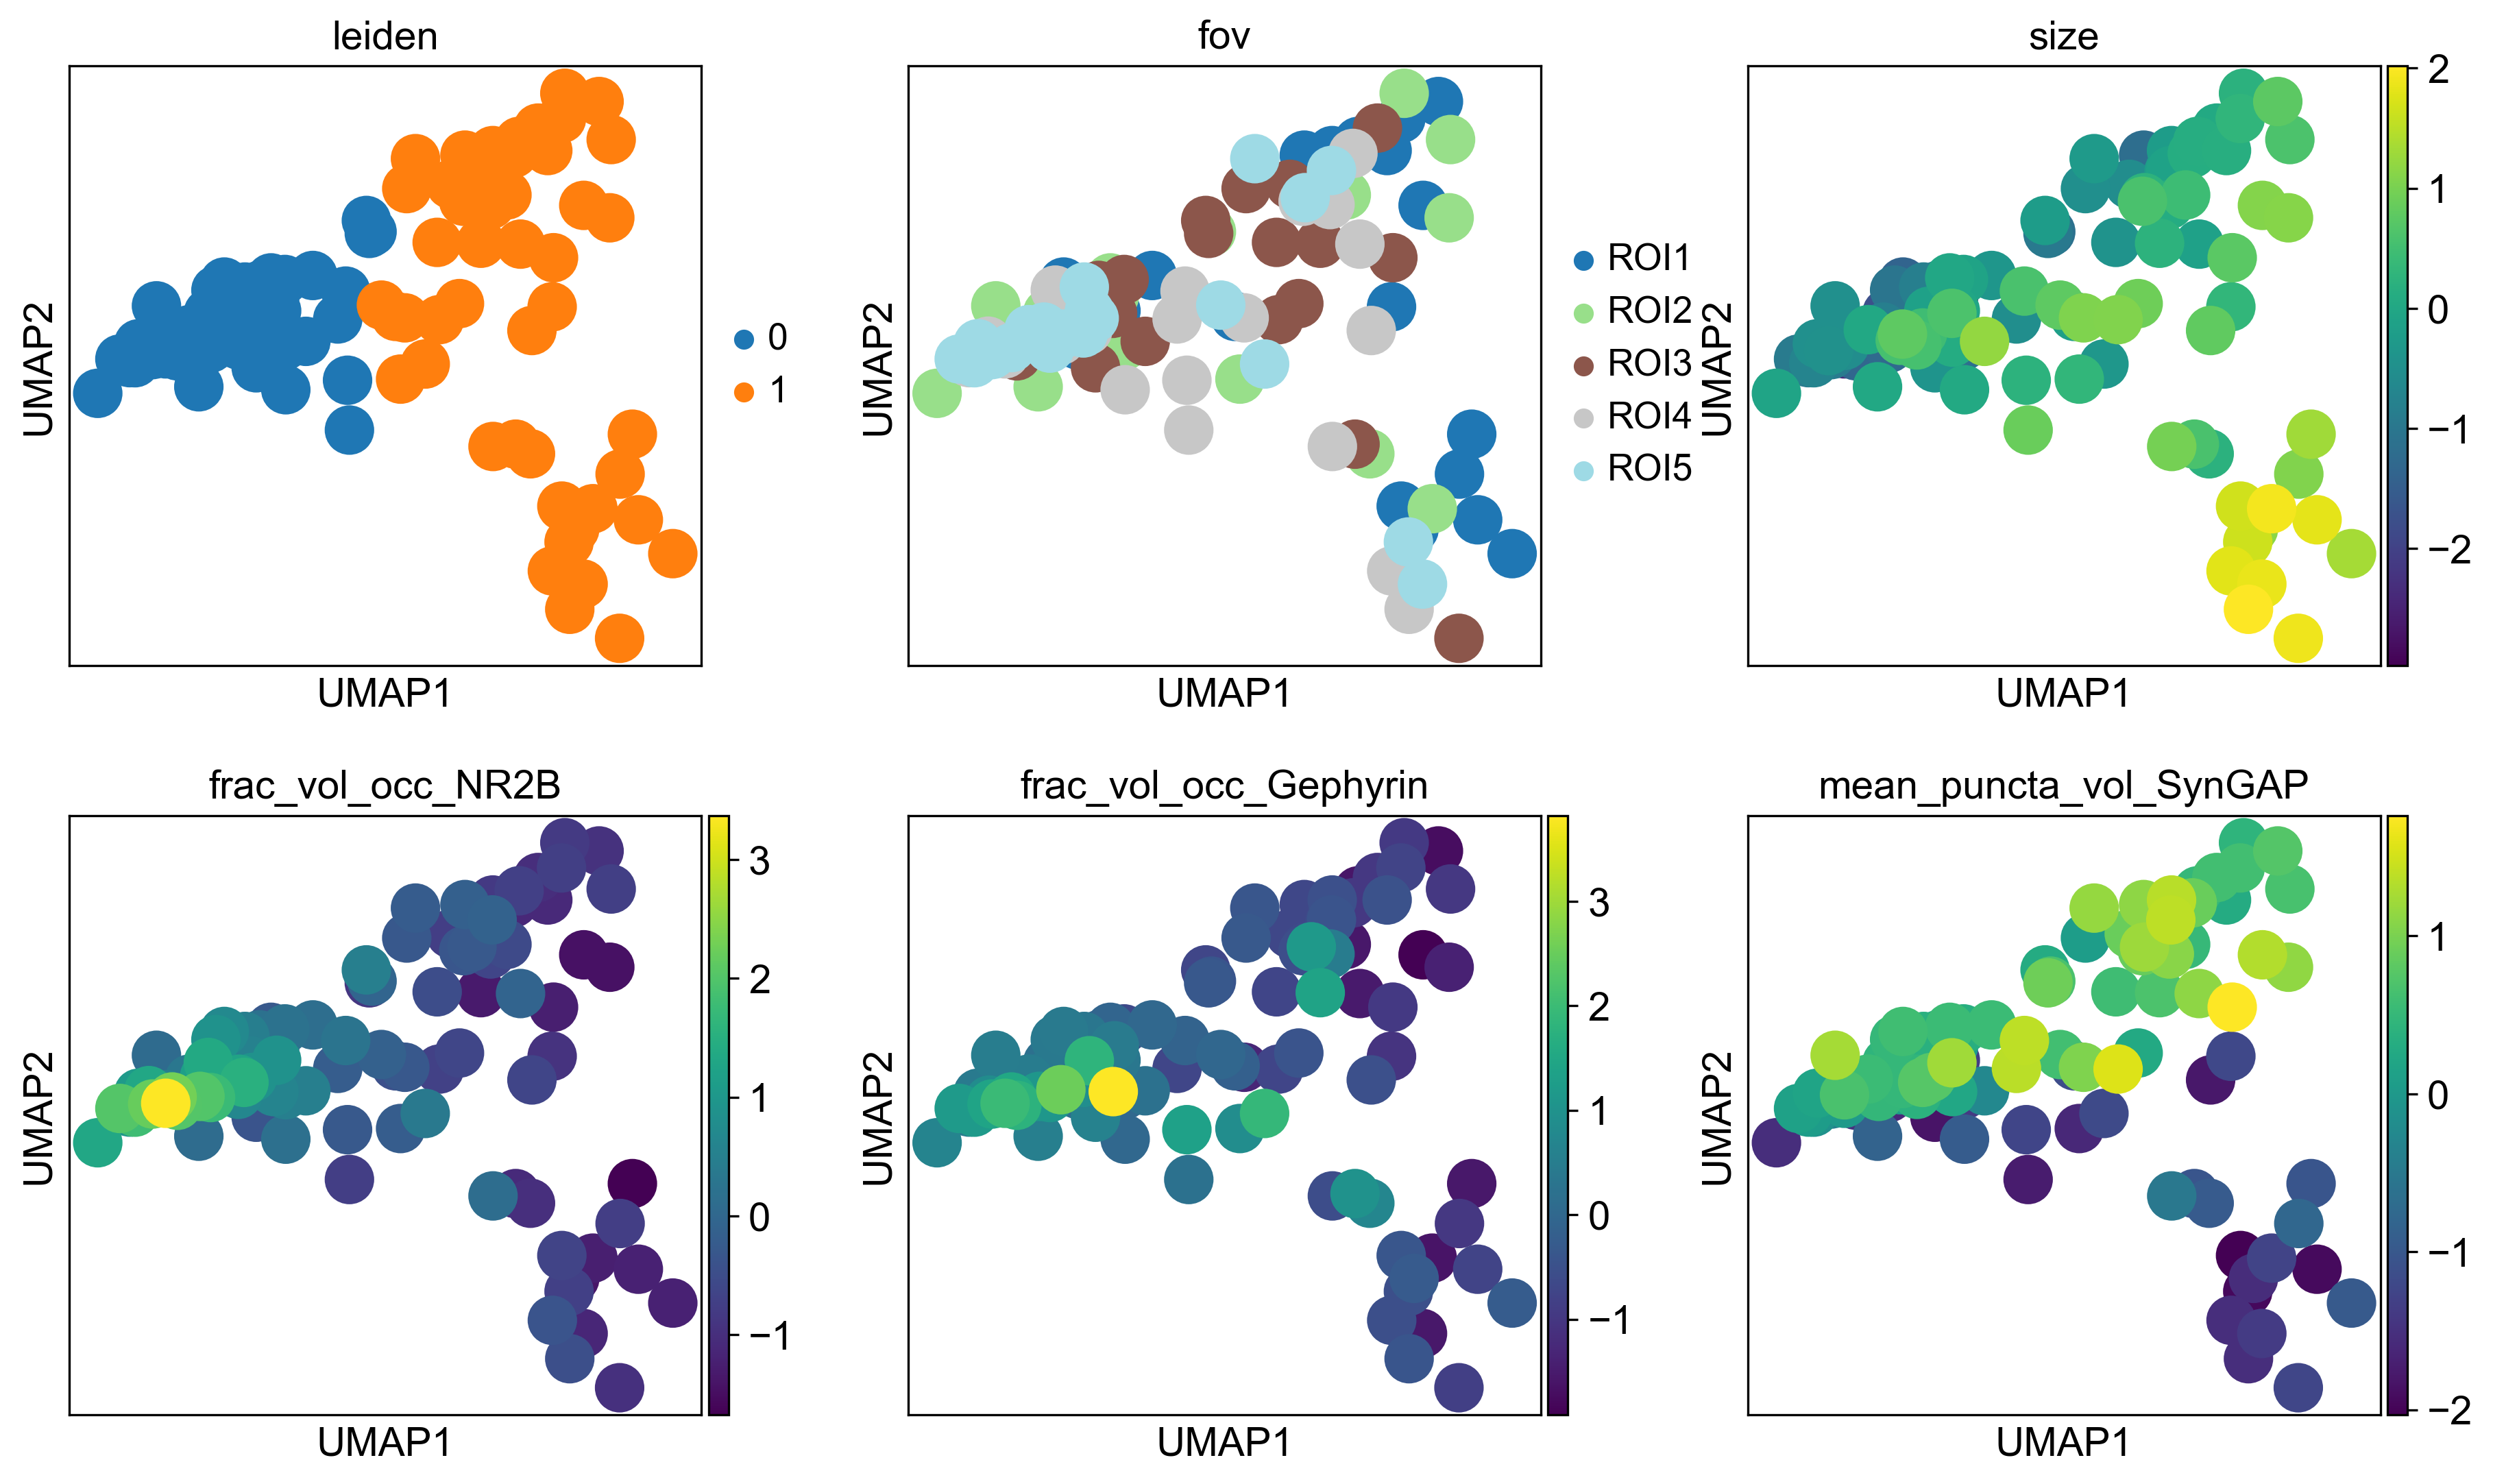

In [54]:
sc.pl.umap(adata, color = marker_vars_forms,ncols=3,use_raw=False)

## From first batch, spit out representative synaptic rois for each cluster

In [55]:
adata[adata.obs['leiden']=='0'].obs[0::10]

fov leiden
ROI1_syn1   ROI1      0
ROI2_syn12  ROI2      0
ROI3_syn10  ROI3      0
ROI4_syn11  ROI4      0
ROI5_syn7   ROI5      0

In [56]:
adata[adata.obs['leiden']=='1'].obs[0::10]

fov leiden
ROI1_syn2   ROI1      1
ROI1_syn14  ROI1      1
ROI2_syn11  ROI2      1
ROI3_syn14  ROI3      1
ROI4_syn14  ROI4      1

# 1) Analyze second dataset

In [57]:
data2 = data2.T
feats = list(data2)

In [58]:
data2 = data2[data2['size']>0] #only take those which passed volume occupation cutoff

## what is distribution of gephyrin in these synapses?

<AxesSubplot:>

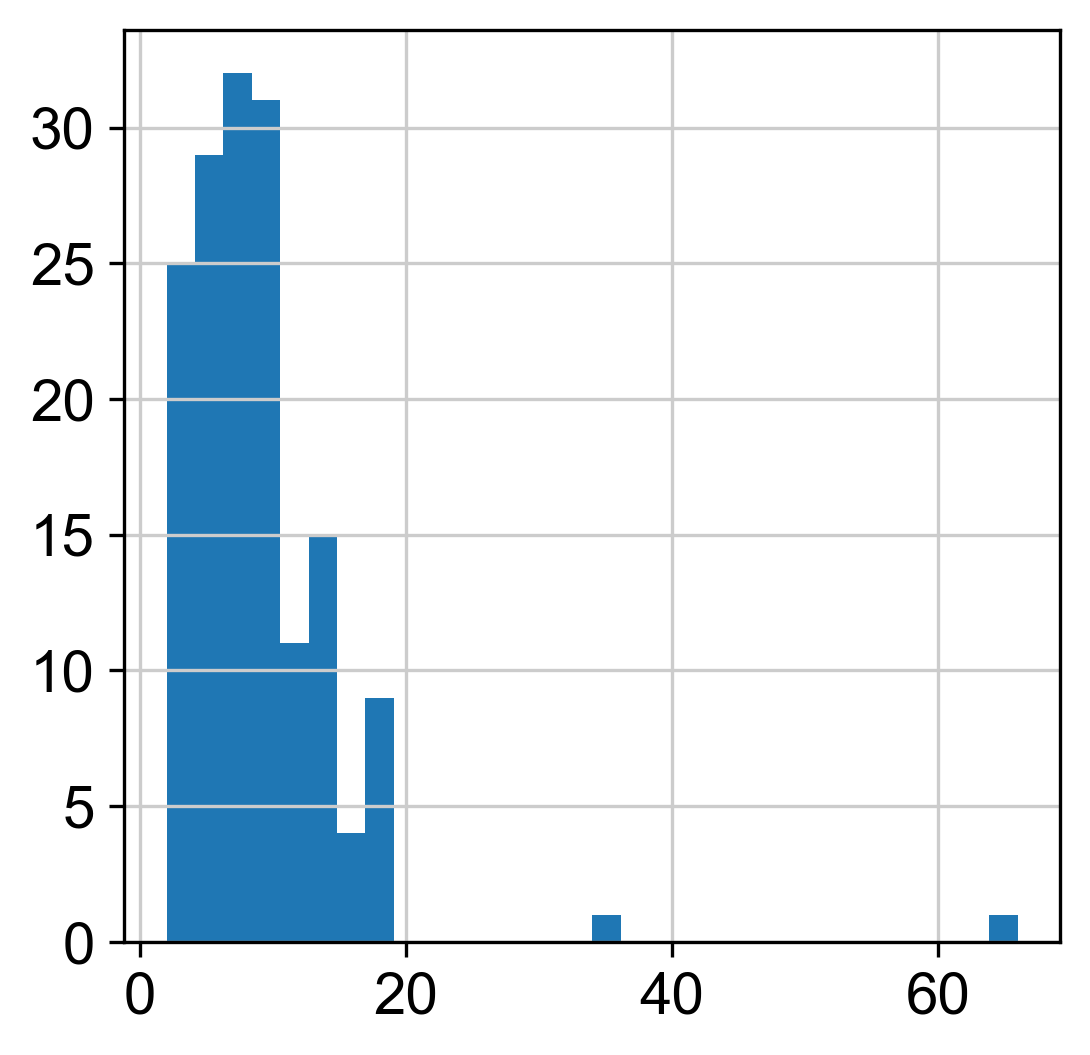

In [59]:
data2['npuncta_Gephyrin'].hist(bins=30)

<AxesSubplot:>

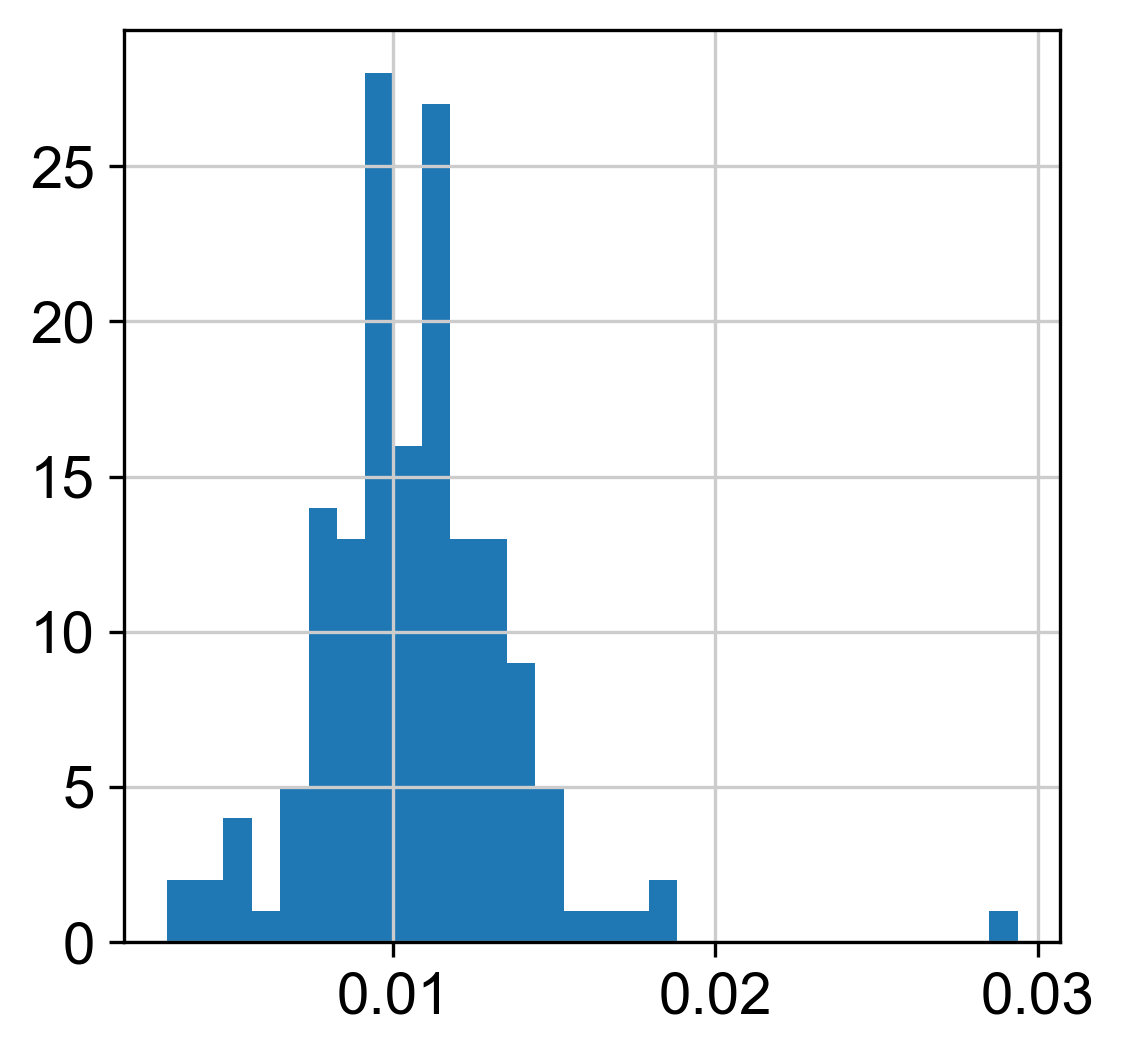

In [60]:
data2['frac_vol_occ_Gephyrin'].hist(bins=30)

<AxesSubplot:>

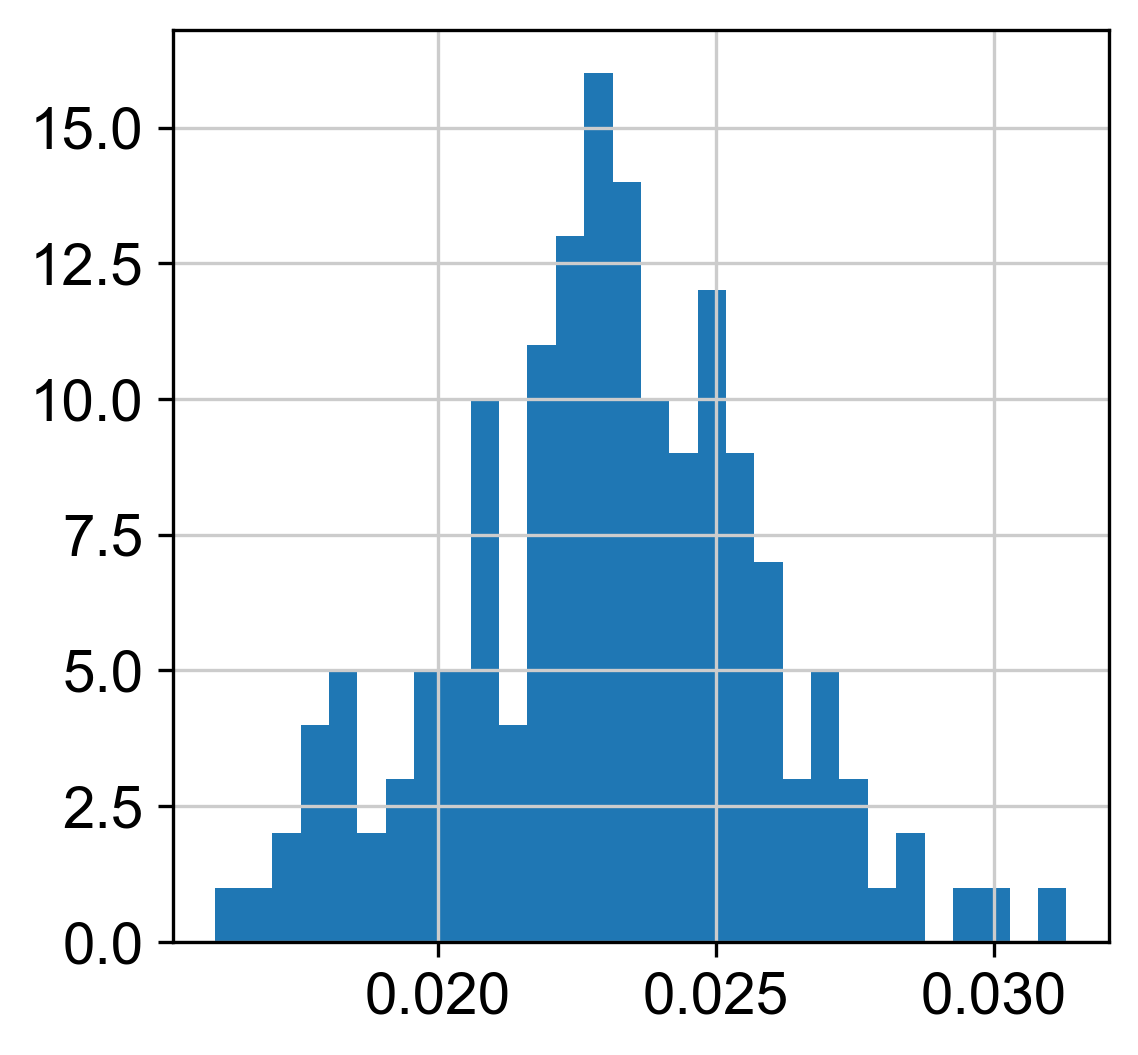

In [61]:
data2['frac_vol_occ_SynGAP'].hist(bins=30)

## Dimensionality reduction and clustering

In [62]:
data2.dropna(axis=1, how='all', inplace=True)

#impute missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(data2)
  
data_clean = imputer.transform(data2)

In [63]:
np.any(np.isnan(data_clean))

False

In [64]:
np.all(np.isfinite(data_clean))

True

In [65]:
len(list(data2))

181

In [66]:
data_clean.shape

(160, 181)

In [67]:
adata = anndata.AnnData(data_clean)
adata.var_names=list(data2)
adata.obs_names=list(data2.index)

/var/folders/71/pthjj8vn7h9596hzsrwryp1w0000gn/T/ipykernel_20123/3367077181.py:1: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(data_clean)


In [68]:
fovs_list = []
for idx, row in data2.iterrows():
    splits = idx.split("_")
    fov = splits[0]
    fovs_list.append(fov)
adata.obs['fov'] = fovs_list

### Cluster synapses using scanpy

In [69]:
list(data2)

['npuncta_SynGAP',
 'npuncta_NR1',
 'npuncta_RIM1',
 'npuncta_Gephyrin',
 'npuncta_GluA4',
 'npuncta_IRSp53',
 'npuncta_GluA1',
 'npuncta_NR2B',
 'npuncta_Homer1',
 'npuncta_CaMKIIa',
 'npuncta_Shank3',
 'npuncta_Bassoon',
 'npuncta_Erbb4',
 'npuncta_Stargazin',
 'npuncta_Elfn1',
 'npuncta_PSD95',
 'npuncta_Cav2.1',
 'npuncta_Vglut',
 'npuncta_GluA2',
 'npuncta_GluA3',
 'size',
 'frac_vol_occ_SynGAP',
 'frac_vol_occ_NR1',
 'frac_vol_occ_RIM1',
 'frac_vol_occ_Gephyrin',
 'frac_vol_occ_GluA4',
 'frac_vol_occ_IRSp53',
 'frac_vol_occ_GluA1',
 'frac_vol_occ_NR2B',
 'frac_vol_occ_Homer1',
 'frac_vol_occ_CaMKIIa',
 'frac_vol_occ_Shank3',
 'frac_vol_occ_Bassoon',
 'frac_vol_occ_Erbb4',
 'frac_vol_occ_Stargazin',
 'frac_vol_occ_Elfn1',
 'frac_vol_occ_PSD95',
 'frac_vol_occ_Cav2.1',
 'frac_vol_occ_Vglut',
 'frac_vol_occ_GluA2',
 'frac_vol_occ_GluA3',
 'mean_puncta_vol_SynGAP',
 'mean_puncta_vol_NR1',
 'mean_puncta_vol_RIM1',
 'mean_puncta_vol_Gephyrin',
 'mean_puncta_vol_GluA4',
 'mean_puncta_vo

In [70]:
adata.raw=adata
sc.pp.normalize_total(adata)#normalizes on a per-synapse basis. so each synapse has values summing to 1
sc.pp.scale(adata,zero_center=True,max_value=10)
np.any(np.isnan(adata.X))

False

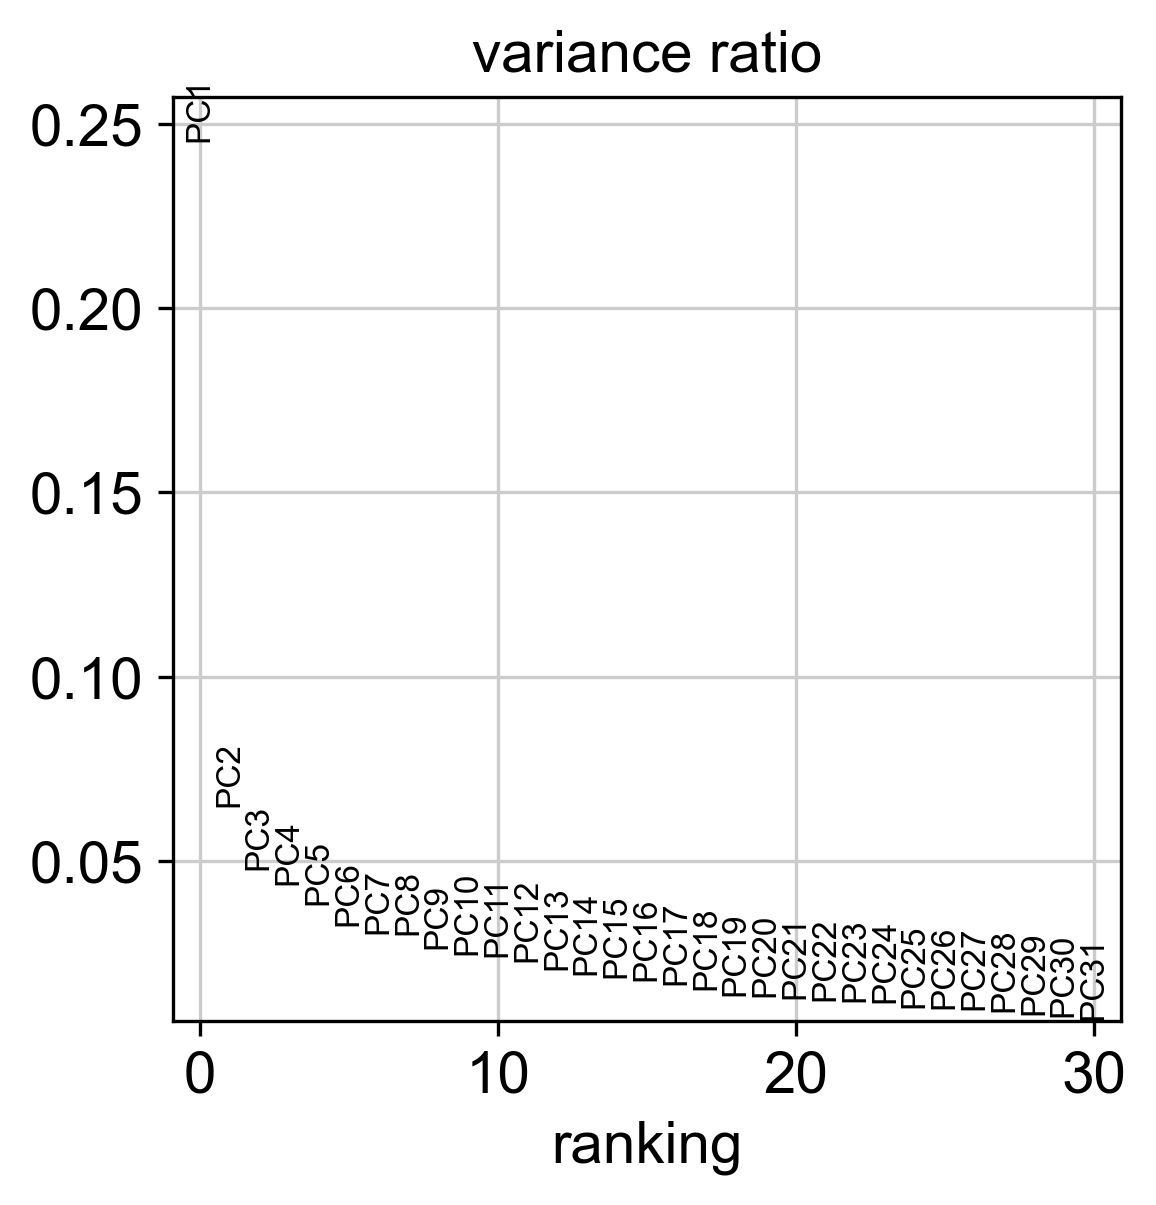

In [71]:
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata)

In [72]:
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=40)

In [73]:
sc.tl.umap(adata)
sc.tl.leiden(adata,resolution=0.50)

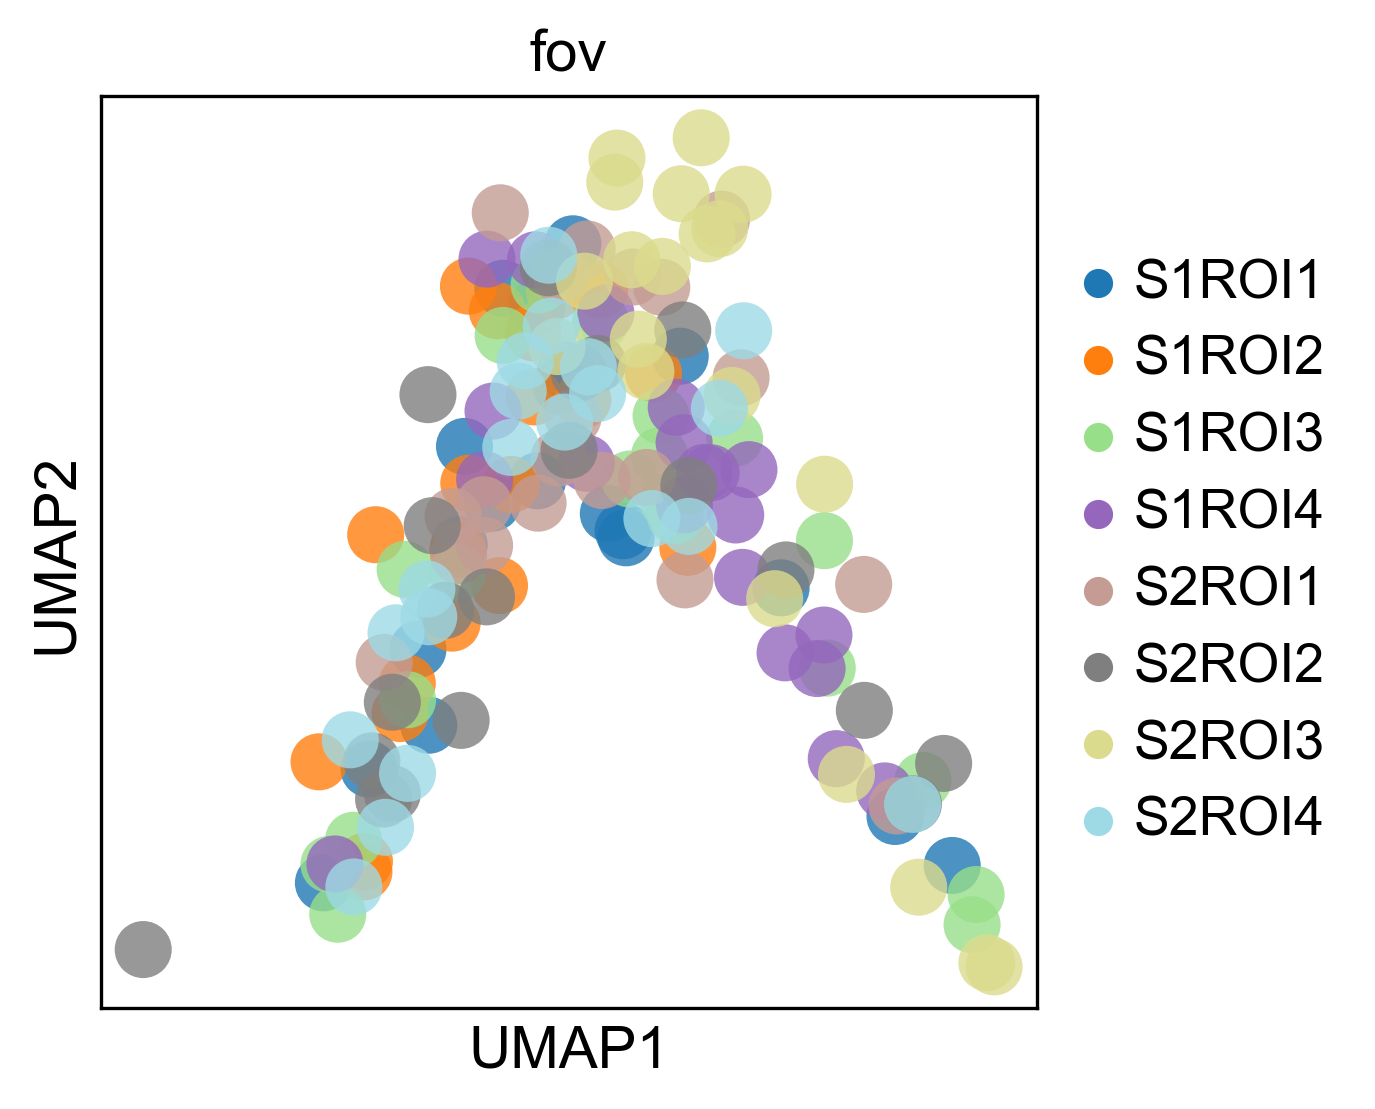

In [74]:
sc.set_figure_params(dpi=300)
sc.pl.umap(adata, color=['fov'],ncols=1,alpha=0.8,palette='tab20')

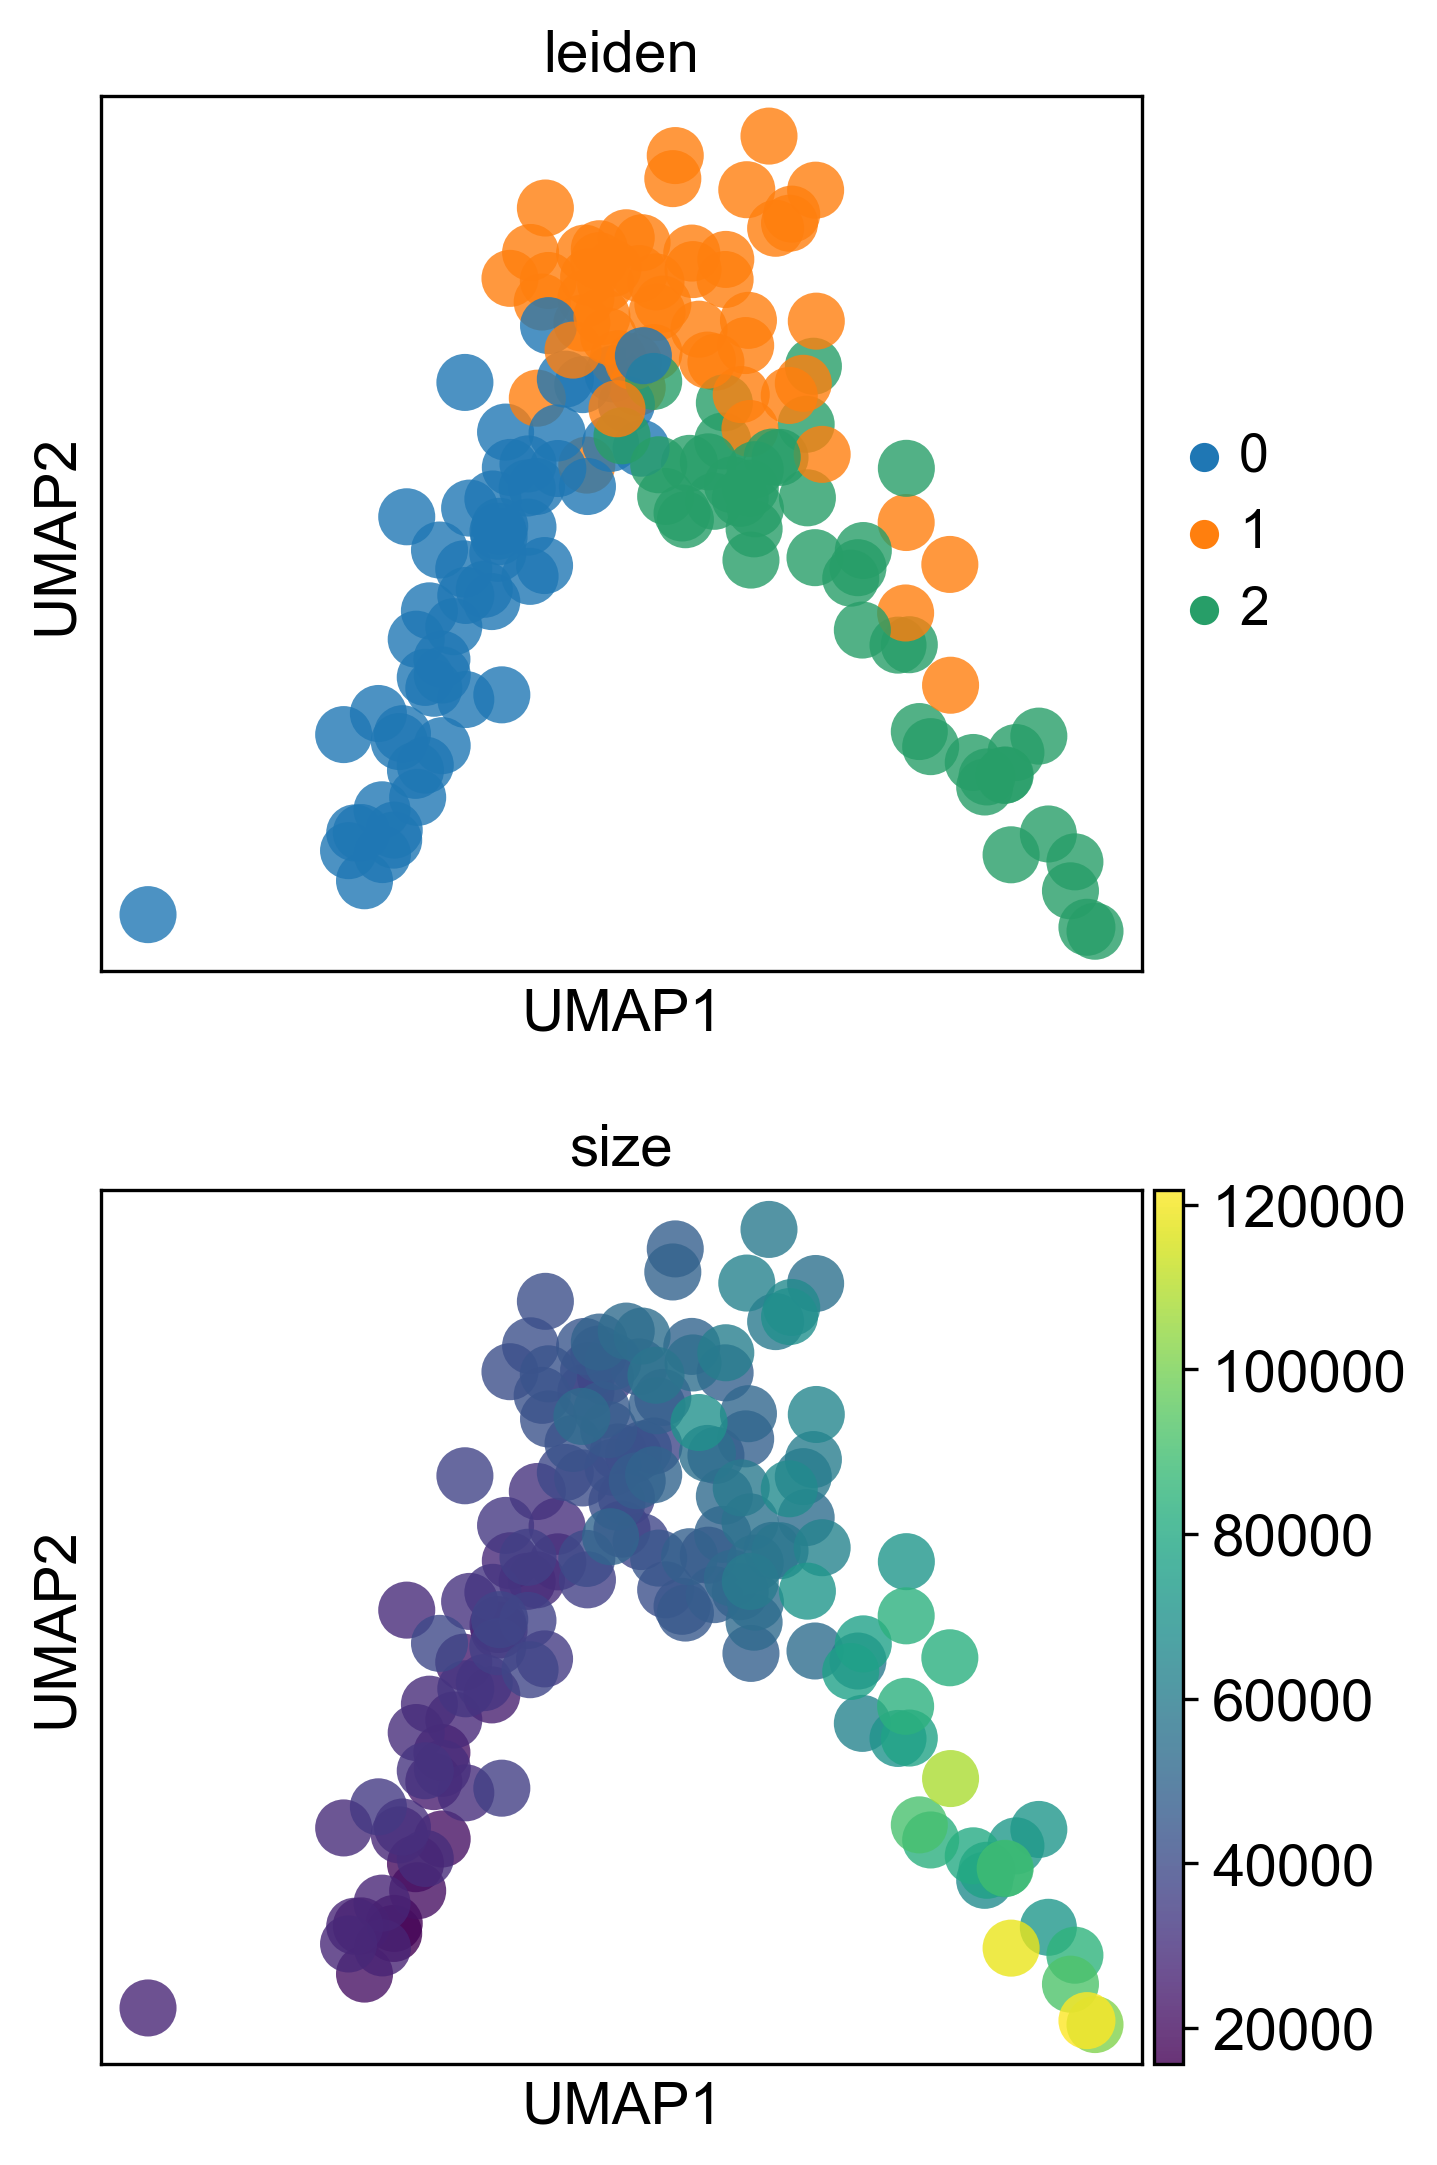

In [75]:
sc.pl.umap(adata, color=['leiden','size'], alpha = 0.8,ncols=1)

In [76]:
clusters = ['0','1','2']

In [77]:
for cluster in clusters:
    adata_sub = adata[adata.obs['leiden']==cluster]
    print(cluster)
    print(adata_sub.obs['fov'].value_counts(normalize=True))

0
S1ROI2    0.206897
S2ROI2    0.172414
S2ROI4    0.172414
S1ROI1    0.137931
S2ROI1    0.137931
S1ROI3    0.120690
S1ROI4    0.051724
Name: fov, dtype: float64
1
S2ROI3    0.250000
S1ROI4    0.142857
S1ROI2    0.125000
S2ROI1    0.125000
S1ROI1    0.107143
S2ROI4    0.107143
S2ROI2    0.089286
S1ROI3    0.053571
Name: fov, dtype: float64
2
S1ROI3    0.217391
S1ROI4    0.195652
S1ROI1    0.130435
S2ROI3    0.130435
S2ROI1    0.108696
S2ROI2    0.108696
S2ROI4    0.086957
S1ROI2    0.021739
Name: fov, dtype: float64


/Users/margaret/miniconda3/envs/scanpy/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8942 (\N{VERTICAL ELLIPSIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


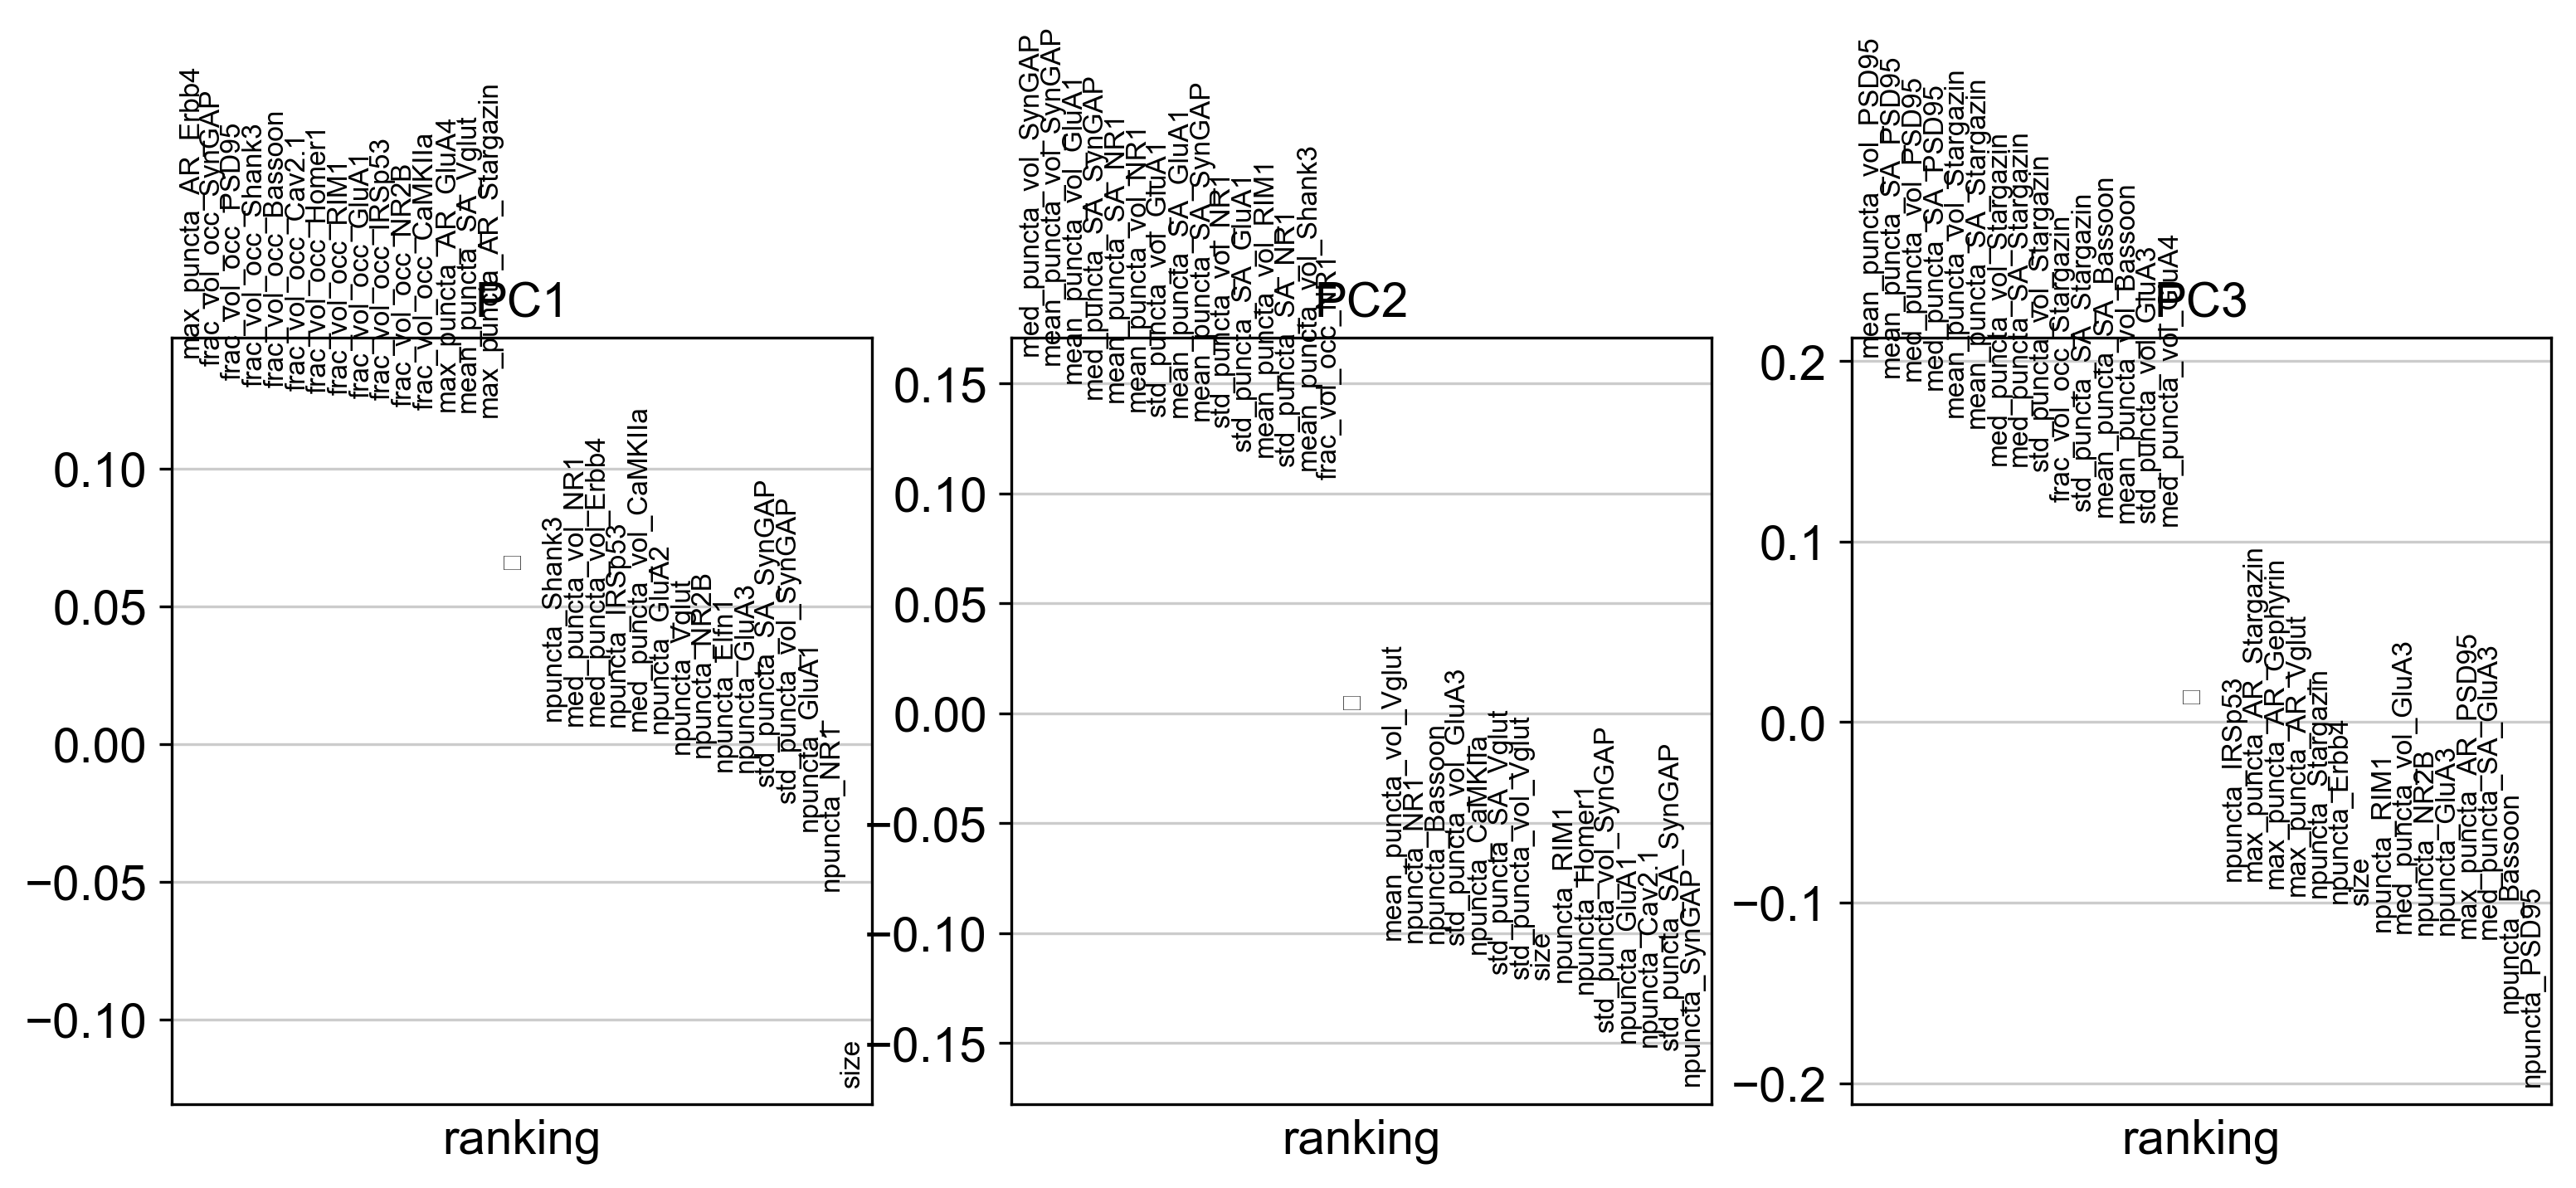

In [78]:
sc.pl.pca_loadings(adata)

In [79]:
#extract marker features for each cluster
sc.tl.rank_genes_groups(adata, groupby='leiden',method='wilcoxon')

/Users/margaret/miniconda3/envs/scanpy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:416: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/Users/margaret/miniconda3/envs/scanpy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/Users/margaret/miniconda3/envs/scanpy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:416: RuntimeWarning: invalid value encountered in true_divide
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/Users/margaret/miniconda3/envs/scanpy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:419: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


In [80]:
markers = pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(10)

markers

0                        1                      2
0    med_puncta_SA_RIM1    med_puncta_vol_SynGAP         npuncta_SynGAP
1   med_puncta_vol_RIM1   mean_puncta_vol_SynGAP   std_puncta_SA_SynGAP
2    frac_vol_occ_GluA1     med_puncta_SA_SynGAP  std_puncta_vol_SynGAP
3    mean_puncta_SA_NR1    mean_puncta_SA_SynGAP                   size
4   mean_puncta_vol_NR1   std_puncta_vol_CaMKIIa          npuncta_GluA1
5    frac_vol_occ_Elfn1    std_puncta_SA_CaMKIIa         npuncta_Cav2.1
6   frac_vol_occ_IRSp53  mean_puncta_vol_CaMKIIa          npuncta_GluA2
7      frac_vol_occ_NR1   mean_puncta_SA_CaMKIIa           npuncta_RIM1
8  med_puncta_SA_IRSp53            npuncta_GluA3         npuncta_Shank3
9     std_puncta_SA_NR1            npuncta_Vglut            npuncta_NR1

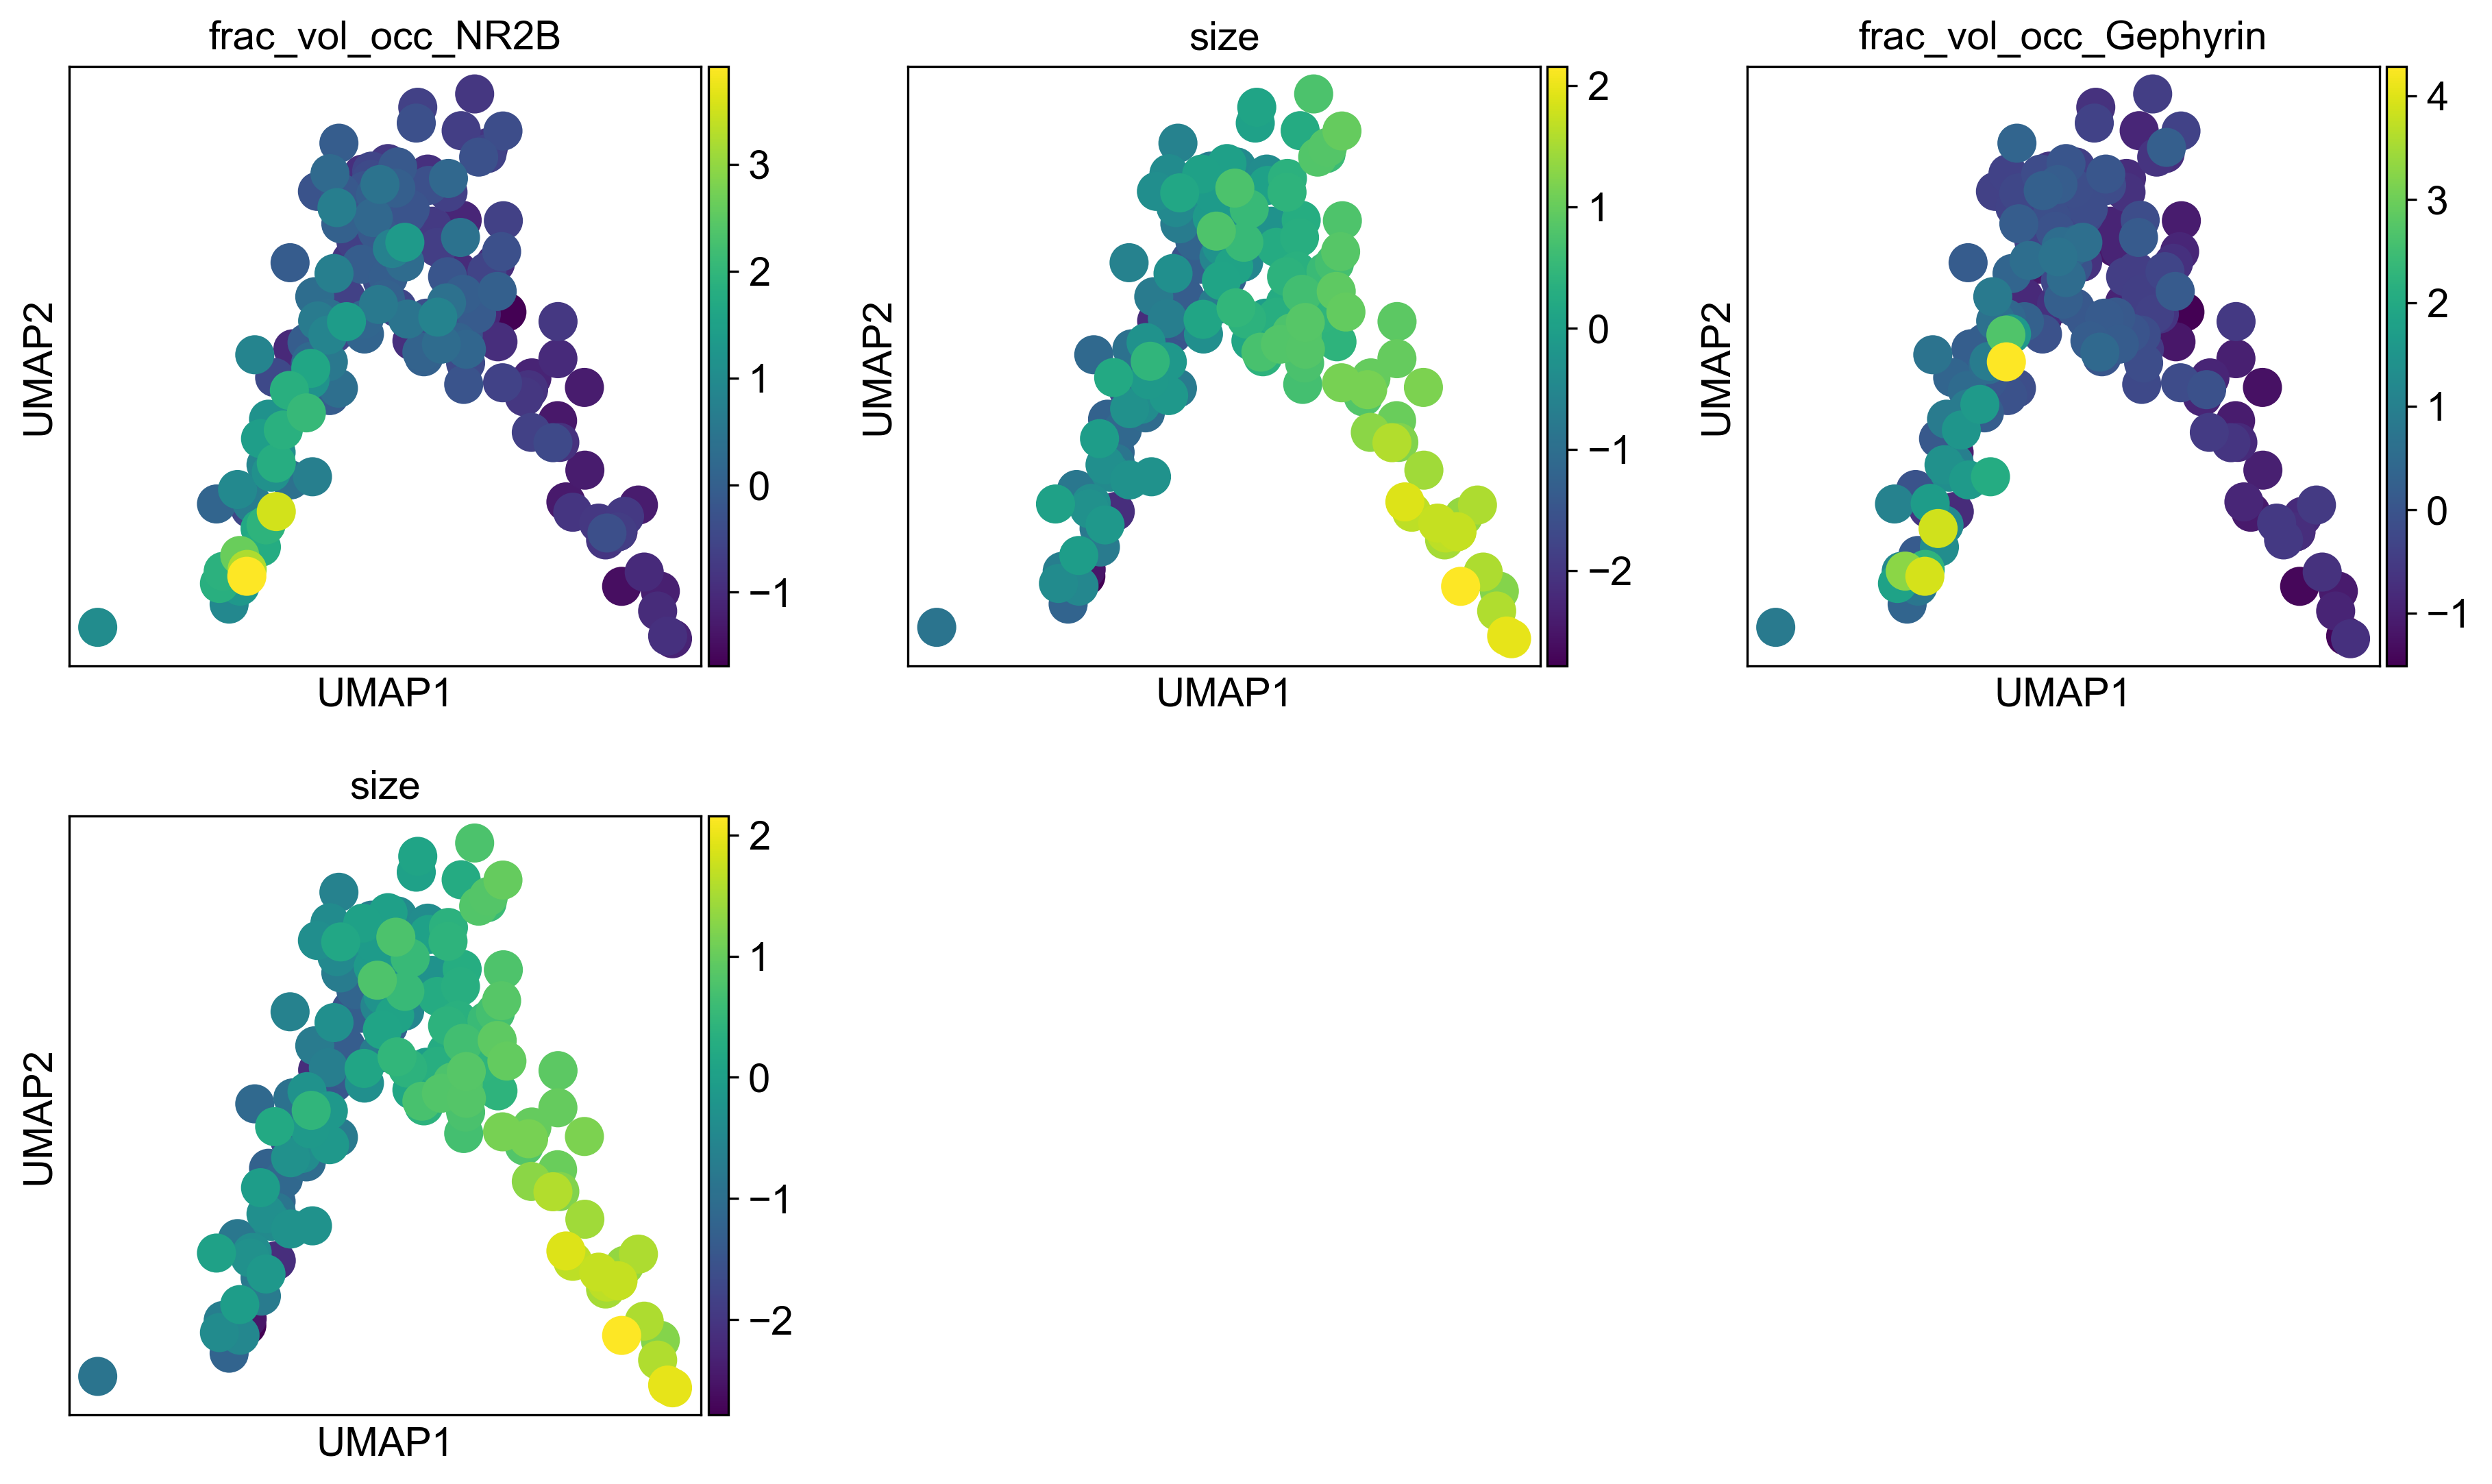

In [81]:
sc.pl.umap(adata, color = marker_vars,ncols=3,use_raw=False)

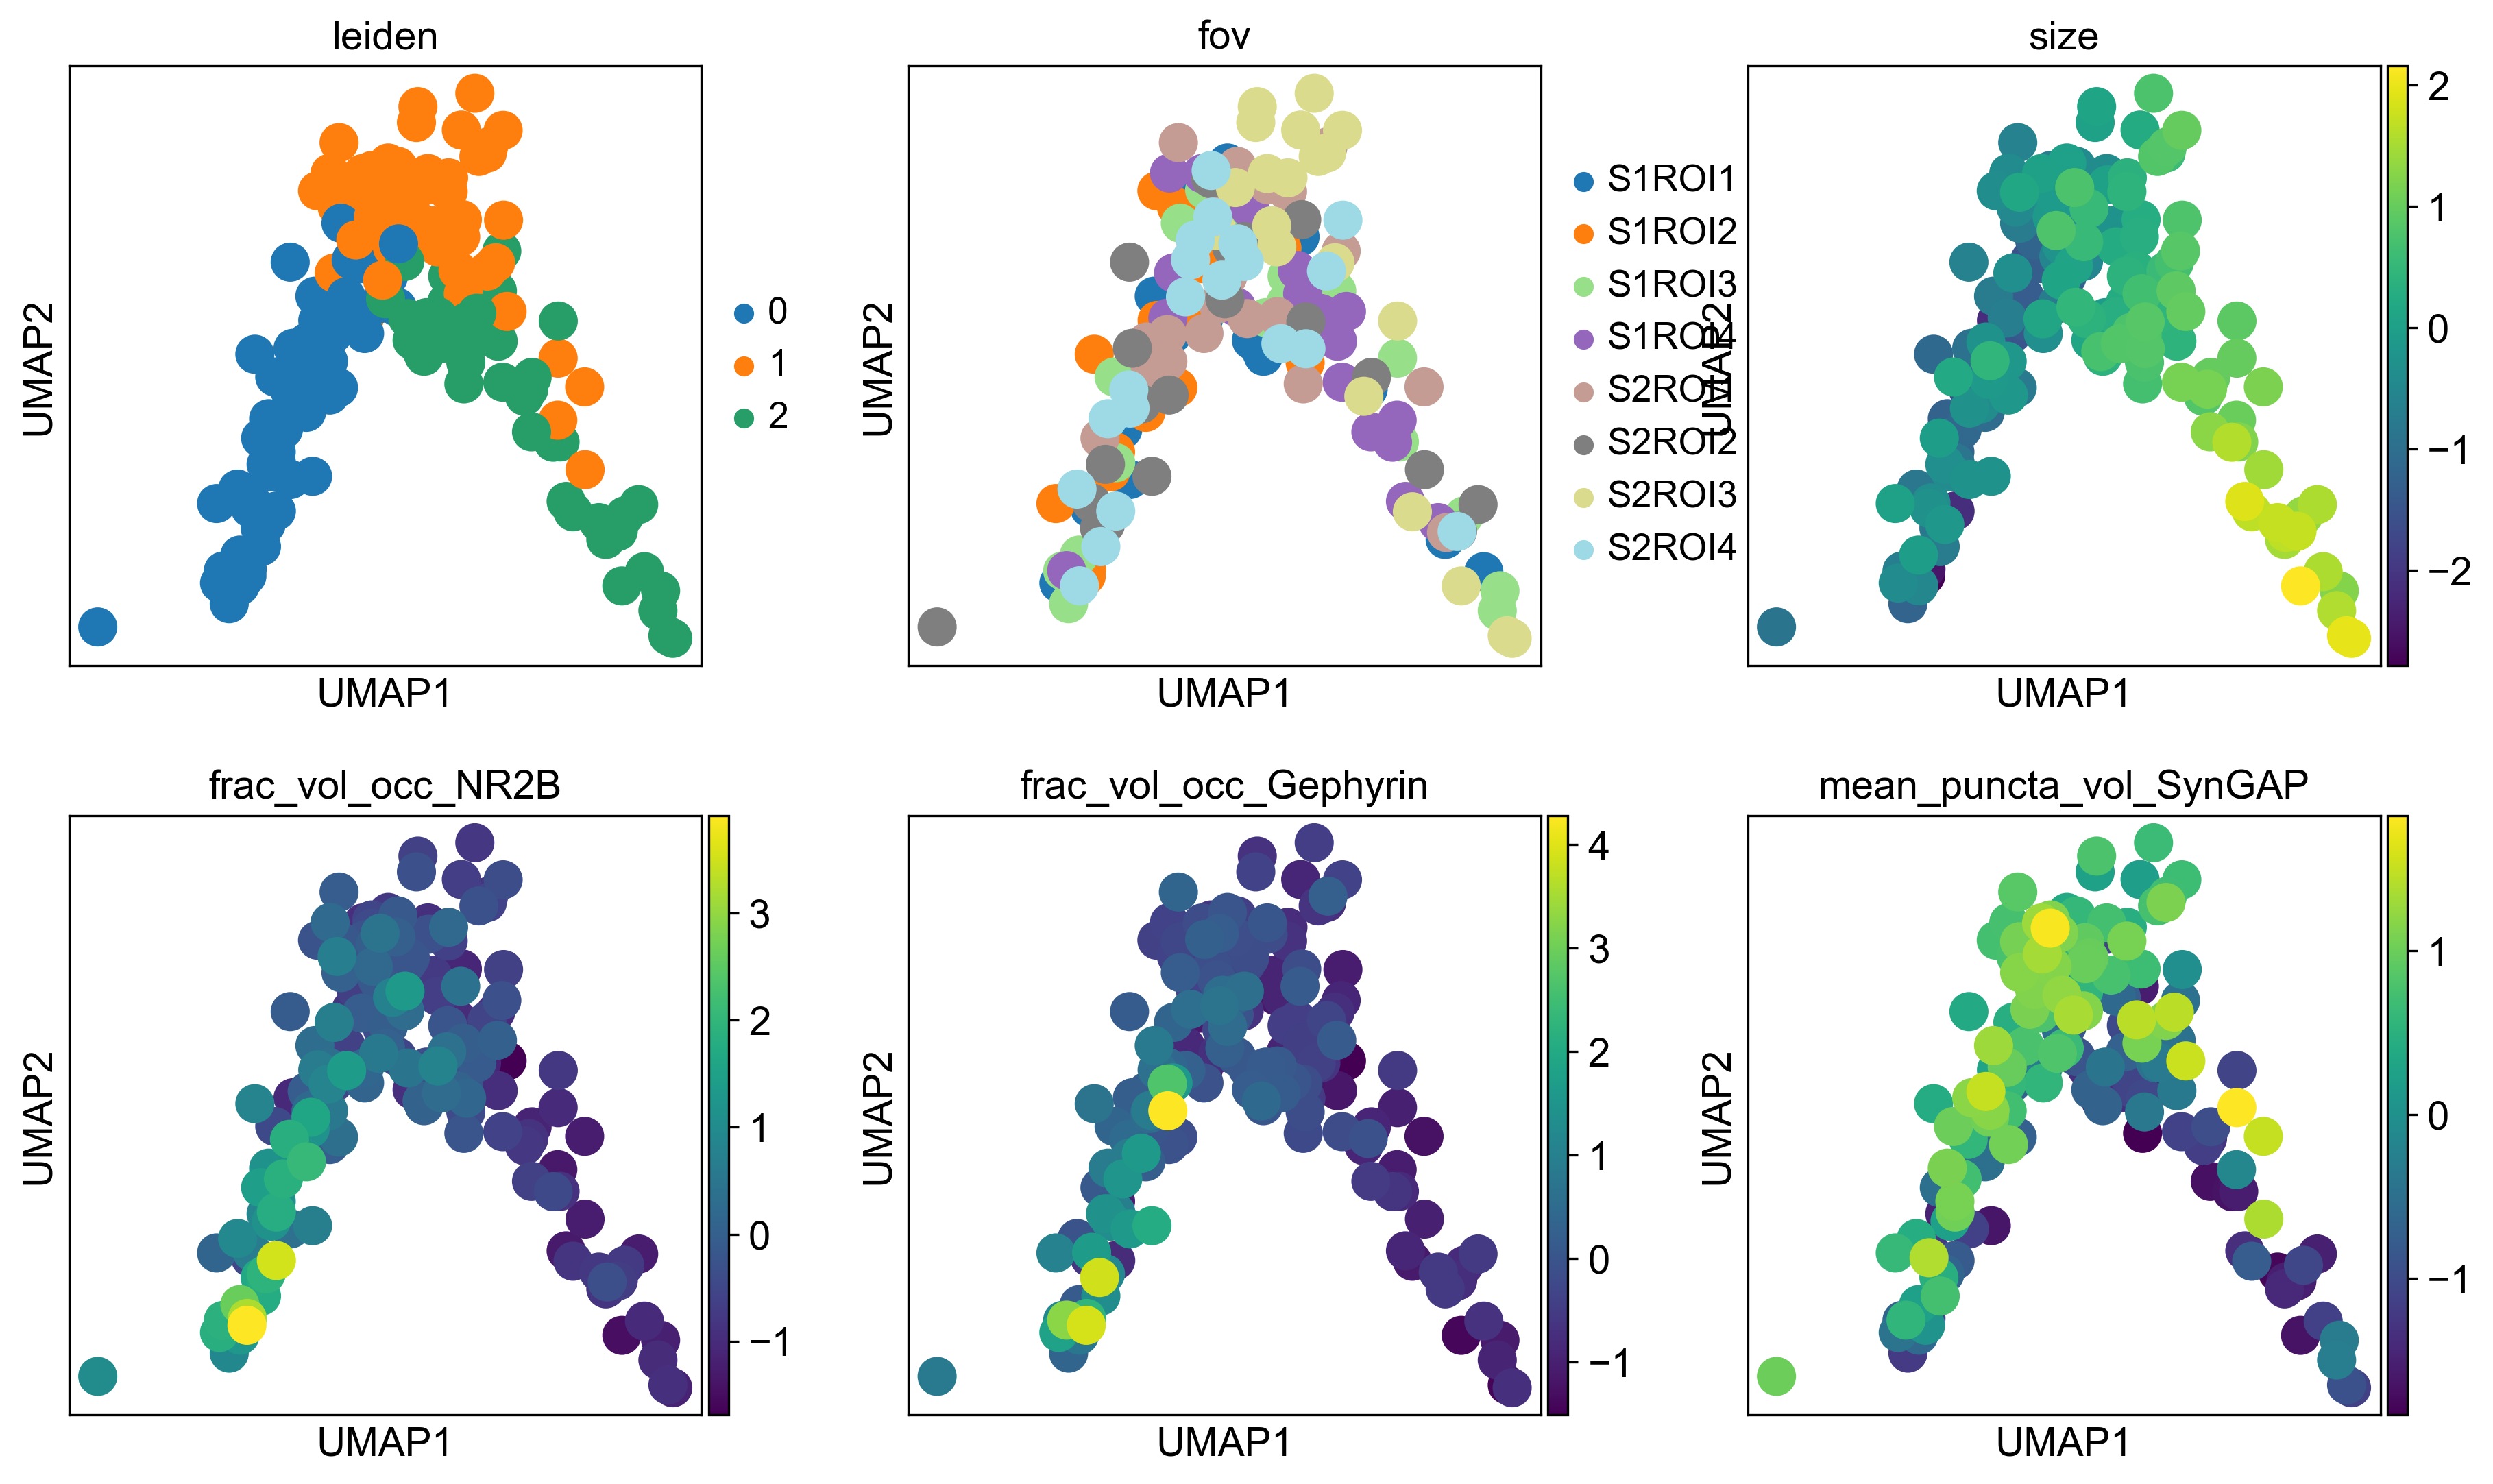

In [82]:
sc.pl.umap(adata, color = marker_vars_forms,ncols=3,use_raw=False)

In [83]:
data2.shape

(160, 181)

## From second batch, spit out representative synaptic rois for each cluster

In [84]:
adata[adata.obs['leiden']=='0'].obs[0::10]

fov leiden
S1ROI1_syn1  S1ROI1      0
S1ROI2_syn9  S1ROI2      0
S1ROI3_syn1  S1ROI3      0
S2ROI1_syn2  S2ROI1      0
S2ROI2_syn6  S2ROI2      0
S2ROI4_syn5  S2ROI4      0

In [85]:
adata[adata.obs['leiden']=='1'].obs[0::10]

fov leiden
S1ROI1_syn7   S1ROI1      1
S1ROI2_syn7   S1ROI2      1
S1ROI4_syn11  S1ROI4      1
S2ROI1_syn19  S2ROI1      1
S2ROI3_syn8   S2ROI3      1
S2ROI4_syn4   S2ROI4      1

In [86]:
adata[adata.obs['leiden']=='2'].obs[0::10]

fov leiden
S1ROI1_syn6   S1ROI1      2
S1ROI3_syn12  S1ROI3      2
S1ROI4_syn6   S1ROI4      2
S2ROI1_syn20  S2ROI1      2
S2ROI3_syn14  S2ROI3      2